<h1> <font color ='green'>Telecom Chum Case Study</font> </h1>
<h3> <font color ='red'>Accomplished by: Arjun Singh Baghel </font> </h3>                                                                      

## Problem Statement

### Business Problem Overview:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition

#### Business Objective:

<li>For many incumbent operators, retaining high profitable customers is the number one business goal.</li>
<li>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</li>

### Understanding of Churn:
In Telecom industry we have two types of payment model:
> Postpaid Customer
> Prepaid Customer

#### Churn Definition based on Payment Model:
> Postpaid model: when customers want to switch to another operator, postpaid users inform the existing operator to terminate the services, and you directly know that this is an instance of churn

>Prepaid model: customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully

### Types of Churn:
>Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

>Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


### Goal of the Project:
<li>
Identify the High Value customers and predict churn</li>
    
<li> Predict the Churn in the last month(using previou months data)</li>

### Project Steps:

   #### 1. Data Overview
   #### 2. Data Manipulation
   #### 3.Exploratory Data Analysis
   <ul>
        <li> High Value customer Churn in data</li>
        <li>Varibles distribution in customer attrition</li>
        <li> Customer attrition in tenure groups</li>
        <li>Monthly Charges and Total Charges by Tenure and Churn group</li>
        <li>Average Charges by tenure groups</li>
        <li>Monthly charges,total charges and tenure in customer attrition</li>
        <li>Variable Summary</li>
        <li>Correlation Matrix</li>
        <li>Visualising data with principal components</li>
        <li>Binary variables distribution in customer attrition(Radar Chart)</li></ul>
  
  #### 4.Data Preprocessing
   #### 5.Model Building
   <ul>
        <li>Baseline Model</li>
        <li> Synthetic Minority Oversampling TEchnique (SMOTE)</li>
        <li>Recursive Feature Elimination</li>
        <li> Univariate Selection</li>
        <li>Decision Tree Visualization</li>
        <li> KNN Classifier</li>
        <li>Vizualising a decision tree from random forest classifier</li>
        <li>A random forest classifier</li>
        <li>Gaussian Naive Bayes</li>
        <li>Support Vector Machine</li>
        <li>Tuning parameters for support vector machine</li>
        <li> LightGBMClassifier</li>
        <li> XGBoost Classifier</li>
        </ul>
        
        
   #### 6.Model Performance
   <ul> <li>Model performance metrics</li>
        <li>Compare model metrics</li>
        <li>Confusion matrices for models</li>
        <li> ROC curve models</li>
        <li> Precision recall curves</li>
        </ul>
        
 

#### Importing Librarires

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format 
sns.set(style = 'white')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score





# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting the display properties
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 9999)

## 1. Data Overview

In [3]:
# Reading data from csv
telecom_df=pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Checking the number of rows & columns
telecom_df.shape

(99999, 226)

In [5]:
# Checking info of all the columns
telecom_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [6]:
# Visualizing the basic statistical of data set
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

As we see from the above results, columns
<li>circle_id</li>
<li>loc_og_t20_mou</li>
<li> std_og_t2o_mou</li>
& many more has 0 variance. As columns with 0 variance won't be contributing to the model's accuracy we will remove those columns

In [7]:
# Printing all columns
telecom_df.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [8]:
# Checking Unique values of data set
print ("\nUnique values :  \n",telecom_df.nunique())


Unique values :  
 mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9               

In [9]:
# Get the missing values % of all the columns
print('\n Null % \n',round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc

In [10]:
# Let's check whether some rows have a large number of missing values.

# missing values in rows
telecom_df.isnull().sum(axis=1)

0         97
1         20
2         30
3         40
4         30
5         40
6         40
7         69
8         20
9         30
10        49
11        31
12        40
13        30
14        40
15        69
16        40
17        40
18        40
19        10
20        40
21        40
22        40
23        10
24        40
25        40
26        40
27        40
28        30
29        69
30        40
31        40
32        49
33         0
34        10
35       127
36        40
37        69
38        30
39         0
40        20
41        40
42        40
43        40
44         0
45       127
46        30
47        20
48        40
49        40
50        40
51        70
52        11
53         0
54        40
55        20
56         0
57         0
58        40
59        40
60        40
61         0
62        30
63        10
64        30
65        40
66        40
67        51
68        99
69        40
70        40
71        30
72        41
73        30
74        40
75        40
76        40

## Data Preparation:
    
    - Scoping our sample to the High valued customer (top 20%) who demonstrated high spending in the initial two months and generating approximately 80% of revenue.
    - Churn Indicator created based on the provided business logics

In [11]:
# create Churn data

new_telecom_df = telecom_df
new_telecom_df['total_rech_amt_good_phase'] = (new_telecom_df['total_rech_amt_6'] + new_telecom_df['total_rech_amt_7'])/2
new_telecom_df = new_telecom_df[new_telecom_df['total_rech_amt_good_phase'] > new_telecom_df['total_rech_amt_good_phase'].quantile(0.70)]

new_telecom_df['total_usage_col'] = new_telecom_df['total_og_mou_9'] + new_telecom_df['total_ic_mou_9'] + new_telecom_df['vol_2g_mb_9'] + new_telecom_df['vol_3g_mb_9']

new_telecom_df['churn'] = np.where(new_telecom_df['total_usage_col']== 0, 1, 0)
new_telecom_df['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [12]:
new_telecom_df = new_telecom_df.drop(['total_rech_amt_good_phase','total_usage_col'],1)

###### As per the analysis scope dropping all the variables of the 9th month after the churn indicator creation

In [13]:
nineth_col = [col for col in new_telecom_df.columns if '_9' in col]
print(new_telecom_df.shape)
new_telecom_df = new_telecom_df.drop(nineth_col, axis = 1)
print(new_telecom_df.shape)
new_telecom_df = new_telecom_df.drop('sep_vbc_3g', axis=1)

(29979, 227)
(29979, 173)


#### Churn rate:

In [14]:
y = new_telecom_df['churn']
churn = (sum(y)/len(y.index))*100
print("Churn Rate : ",churn)
print('Shape :',new_telecom_df.shape)

Churn Rate :  8.636045231662164
Shape : (29979, 172)


In [15]:
#delete coloums having all values are zero or constant
new_telecom_df1 = new_telecom_df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [16]:
#Droping colume
fields_to_be_imputed_with_2 = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        new_telecom_df1 = new_telecom_df1.drop([field_to_be_imputed_with_2], 1)
        
print(new_telecom_df1.shape)

(29979, 129)


In [17]:
# Filling null value
fields_to_be_imputed_with_2 = ['date_of_last_rech']

for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        new_telecom_df1[field_to_be_imputed_with_2].fillna(new_telecom_df1[field_to_be_imputed_with_2].mode()[0], inplace=True)

In [18]:
# Setting data type of some columns
new_telecom_df1['date_of_last_rech_6'] = pd.to_datetime(new_telecom_df1.date_of_last_rech_6).dt.day
new_telecom_df1['date_of_last_rech_7'] = pd.to_datetime(new_telecom_df1.date_of_last_rech_7).dt.day
new_telecom_df1['date_of_last_rech_8'] = pd.to_datetime(new_telecom_df1.date_of_last_rech_8).dt.day

In [19]:
# mputing missing observations with Median column value
missing_cols = new_telecom_df1.columns[new_telecom_df1.isnull().sum()>0]
for col in missing_cols:
    new_telecom_df1[col].fillna((new_telecom_df1[col].median()), inplace=True)
new_telecom_df1.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

In [20]:
# Chechking missing value %
round(100*(new_telecom_df1.isnull().sum()/len(new_telecom_df1.index)), 2)

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
s

In [21]:
new_telecom_df1.shape

(29979, 129)

#### Outlier Analysis

In [22]:
new_telecom_df2 = new_telecom_df1

In [23]:
new_telecom_df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    587.587624    589.424681    535.067748    297.590611   
std     6.846594e+05    442.848876    463.049067    492.447887    460.257092   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000028e+09     18.221200     25.600600      0.000000      0.000000   
10%     7.000269e+09    270.692200    274.458200    134.118600     12.230000   
25%     7.000641e+09    364.352500    365.235000    289.782000     43.590000   
50%     7.001232e+09    495.951000    493.781000    452.232000    128.480000   
75%     7.001814e+09    704.184500    700.986000    671.349500    353.500000   
90%     7.002167e+09    994.311800    996.051400    985.499200    795.354000   
95%     7.002287e+09   1240.976700   1261.848400   1258.703300   1154.900000   
99%     7.002387e+09   1983.590100   1999.509680   1988.082260   2166.876000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     305.886840    271.137938    421.142281    426.990330    383.029940   
std      481.318377    465.205131    468.998414    485.030117    473.464516   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      1.057800      1.099000      0.000000   
10%       11.726000      6.906000     58.606000     59.604000     35.072000   
25%       43.370000     34.060000    142.860000    141.280000    111.780000   
50%      128.120000    106.390000    285.990000    285.630000    251.530000   
75%      360.360000    298.215000    523.625000    532.905000    483.000000   
90%      825.486000    724.182000    916.490000    935.716000    854.006000   
95%     1208.691000   1115.857000   1271.757000   1287.221000   1188.523000   
99%     2220.577600   2189.445800   2328.192600   2411.004400   2212.303000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       17.428073      13.535270      13.263074      29.348362   
std        79.192826      76.343222      74.588105     118.629898   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        32.740000      18.390000      18.664000      64.604000   
95%        94.663000      63.422000      62.813000     168.647000   
99%       349.546000     292.851400     288.536400     544.085400   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       22.056425      21.483542         95.084989         96.129949   
std        97.974803     106.294911        236.844869        248.141101   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          1.190000          1.460000   
25%         0.000000       0.000000          8.990000          9.770000   
50%         0.000000       0.000000         33.340000         33.890000   
75%         0.000000       0.000000         91.550000         91.535000   
90%        41.216000      37.150000        208.006000        2

- Above we can see that outlier

In [24]:
# Handeling outlier
cont_cols = [col for col in new_telecom_df2.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    percentiles = new_telecom_df2[col].quantile([0.01,0.99]).values
    new_telecom_df2[col][new_telecom_df2[col] <= percentiles[0]] = percentiles[0]
    new_telecom_df2[col][new_telecom_df2[col] >= percentiles[1]] = percentiles[1]

In [25]:
new_telecom_df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    578.115790    579.934200    524.618925    288.909740   
std     6.846594e+05    336.036348    338.202040    370.788082    404.375323   
min     7.000000e+09     18.221200     25.600600      0.000000      0.000000   
1%      7.000028e+09     18.228064     25.732732      0.000000      0.000000   
10%     7.000269e+09    270.692200    274.458200    134.118600     12.230000   
25%     7.000641e+09    364.352500    365.235000    289.782000     43.590000   
50%     7.001232e+09    495.951000    493.781000    452.232000    128.480000   
75%     7.001814e+09    704.184500    700.986000    671.349500    353.500000   
90%     7.002167e+09    994.311800    996.051400    985.499200    795.354000   
95%     7.002287e+09   1240.976700   1261.848400   1258.703300   1154.900000   
99%     7.002387e+09   1983.254622   1999.502130   1988.059437   2166.652920   
max     7.002411e+09   1983.590100   1999.509680   1988.082260   2166.876000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     296.580898    261.866393    413.363109    418.408660    373.082685   
std      419.262037    398.634242    420.037947    429.176148    401.058913   
min        0.000000      0.000000      1.057800      1.099000      0.000000   
1%         0.000000      0.000000      1.059516      1.107580      0.000000   
10%       11.726000      6.906000     58.606000     59.604000     35.072000   
25%       43.370000     34.060000    142.860000    141.280000    111.780000   
50%      128.120000    106.390000    285.990000    285.630000    251.530000   
75%      360.360000    298.215000    523.625000    532.905000    483.000000   
90%      825.486000    724.182000    916.490000    935.716000    854.006000   
95%     1208.691000   1115.857000   1271.757000   1287.221000   1188.523000   
99%     2220.563872   2189.207276   2326.763172   2410.915168   2212.191460   
max     2220.577600   2189.445800   2328.192600   2411.004400   2212.303000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       14.818088      10.647736      10.598445      25.590695   
std        51.263410      40.794809      40.387159      83.380345   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        32.740000      18.390000      18.664000      64.604000   
95%        94.663000      63.422000      62.813000     168.647000   
99%       349.494520     292.702108     288.515808     543.815988   
max       349.546000     292.851400     288.536400     544.085400   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       18.618014      17.589295         87.005853         86.958154   
std        65.793561      62.838544        159.958459        158.004522   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          1.190000          1.460000   
25%         0.000000       0.000000          8.990000          9.770000   
50%         0.000000       0.000000         33.340000         33.890000   
75%         0.000000       0.000000         91.550000         91.535000   
90%        41.216000      37.150000        208.006000        2

In [26]:
new_telecom_df2['int_usage_median'] = new_telecom_df2[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
new_telecom_df2['int_usage_median'] = new_telecom_df2.int_usage_median.map(lambda x: 1 if x == 0 else 0)
new_telecom_df2 = new_telecom_df2.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


new_telecom_df2['tenure_buck'] = np.round(new_telecom_df2['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
new_telecom_df2['tenure_buck'] = pd.cut(new_telecom_df2['tenure_buck'], bins)
new_telecom_df2['tenure_buck'].value_counts()

(4, 10]    9681
(1, 2]     7486
(0, 1]     5320
(2, 3]     4530
(3, 4]     2962
Name: tenure_buck, dtype: int64

In [27]:
# Create correlation matrix
corr_matrix = new_telecom_df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

new_telecom_df2 = new_telecom_df2.drop(to_drop, 1)

##### Dummy Creation 

In [28]:
#createing dummies  
new_telecom_df2 = pd.get_dummies(new_telecom_df2, drop_first=True)
new_telecom_df2.head()

mobile_number    arpu_6     arpu_7      arpu_8  onnet_mou_6  offnet_mou_6  \
7      7000701601  1069.180  1349.8500  1988.08226        57.84        453.43   
8      7001524846   378.721   492.2230   137.36200       413.69         94.66   
13     7002191713   492.846   205.6710   593.26000       501.76        413.31   
16     7000875565   430.975   299.8690   187.89400        50.51        296.29   
17     7000187447   690.008    25.6006    25.49900      1185.91         61.64   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7        567.160          16.23          33.49          31.64   
8         80.630           0.00           0.00           0.00   
13       119.280          23.53         144.24          72.11   
16       229.740           0.00           2.83           0.00   
17         1.099           0.00           4.76           4.81   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
7              51.39            308.63             62.13               0.0   
8             297.13             80.96              0.00               0.0   
13             49.63            151.13              4.54               0.0   
16             42.61            273.29              0.00               0.0   
17             38.99             58.54              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7                0.0              0.00              6.66             20.08   
8                0.0              7.15              0.00              0.00   
13               0.0              0.49              0.00              0.00   
16               0.0              0.00              0.00              0.00   
17               0.0              0.00              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7              16.68           0.0          4.50          0.00          6.50   
8               0.00           0.0          0.00          0.00         10.23   
13              0.00           0.0          0.00          0.00          4.78   
16              0.00           0.0          0.00          3.26          5.91   
17              0.00           0.0          2.58          0.00          0.00   

    og_others_6  og_others_7  og_others_8  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
7          0.00          0.0          0.0             58.14            217.56   
8          0.00          0.0          0.0             23.84             57.58   
13         0.00          0.0          0.0             67.88            142.88   
16         0.00          0.0          0.0             41.33            226.81   
17         0.93          0.0          0.0             34.54             47.41   

    loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2m_mou_6  \
7             152.16             36.89             11.83             91.44   
8               0.00              0.00              0.58             22.43   
13              4.81            115.68             38.29            308.13   
16              8.71             68.79             78.64             18.68   
17              0.00              8.63              0.00              1.28   

    std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  spl_ic_mou_6  \
7              52.19             34.24             22.21          0.21   
8               0.00              0.00              0.00          0.00   
13              0.00              0.00              1.91          0.45   
16              0.51              0.00              2.18          0.00   
17              0.00              0.00              0.00          0.00   

    spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  ic_others_6  ic_others_7  \
7            0.0           0.0         2.060      15.7400        15.19   
8            0.0           0.0         0.000       0.0000         0.00   
13           0.0           0.0       239.192      20.7408        16.24   
16        

In [29]:
# Renaming columns
new_telecom_df2.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                   "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)
new_telecom_df2.head()

mobile_number    arpu_6     arpu_7      arpu_8  onnet_mou_6  offnet_mou_6  \
7      7000701601  1069.180  1349.8500  1988.08226        57.84        453.43   
8      7001524846   378.721   492.2230   137.36200       413.69         94.66   
13     7002191713   492.846   205.6710   593.26000       501.76        413.31   
16     7000875565   430.975   299.8690   187.89400        50.51        296.29   
17     7000187447   690.008    25.6006    25.49900      1185.91         61.64   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7        567.160          16.23          33.49          31.64   
8         80.630           0.00           0.00           0.00   
13       119.280          23.53         144.24          72.11   
16       229.740           0.00           2.83           0.00   
17         1.099           0.00           4.76           4.81   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
7              51.39            308.63             62.13               0.0   
8             297.13             80.96              0.00               0.0   
13             49.63            151.13              4.54               0.0   
16             42.61            273.29              0.00               0.0   
17             38.99             58.54              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7                0.0              0.00              6.66             20.08   
8                0.0              7.15              0.00              0.00   
13               0.0              0.49              0.00              0.00   
16               0.0              0.00              0.00              0.00   
17               0.0              0.00              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7              16.68           0.0          4.50          0.00          6.50   
8               0.00           0.0          0.00          0.00         10.23   
13              0.00           0.0          0.00          0.00          4.78   
16              0.00           0.0          0.00          3.26          5.91   
17              0.00           0.0          2.58          0.00          0.00   

    og_others_6  og_others_7  og_others_8  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
7          0.00          0.0          0.0             58.14            217.56   
8          0.00          0.0          0.0             23.84             57.58   
13         0.00          0.0          0.0             67.88            142.88   
16         0.00          0.0          0.0             41.33            226.81   
17         0.93          0.0          0.0             34.54             47.41   

    loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2m_mou_6  \
7             152.16             36.89             11.83             91.44   
8               0.00              0.00              0.58             22.43   
13              4.81            115.68             38.29            308.13   
16              8.71             68.79             78.64             18.68   
17              0.00              8.63              0.00              1.28   

    std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  spl_ic_mou_6  \
7              52.19             34.24             22.21          0.21   
8               0.00              0.00              0.00          0.00   
13              0.00              0.00              1.91          0.45   
16              0.51              0.00              2.18          0.00   
17              0.00              0.00              0.00          0.00   

    spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  ic_others_6  ic_others_7  \
7            0.0           0.0         2.060      15.7400        15.19   
8            0.0           0.0         0.000       0.0000         0.00   
13           0.0           0.0       239.192      20.7408        16.24   
16        

In [30]:
# After outlier treatment droping column which don't have much variance or zero variance
new_telecom_df3 = new_telecom_df2.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)
new_telecom_df3.head()

mobile_number    arpu_6     arpu_7      arpu_8  onnet_mou_6  offnet_mou_6  \
7      7000701601  1069.180  1349.8500  1988.08226        57.84        453.43   
8      7001524846   378.721   492.2230   137.36200       413.69         94.66   
13     7002191713   492.846   205.6710   593.26000       501.76        413.31   
16     7000875565   430.975   299.8690   187.89400        50.51        296.29   
17     7000187447   690.008    25.6006    25.49900      1185.91         61.64   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7        567.160          16.23          33.49          31.64   
8         80.630           0.00           0.00           0.00   
13       119.280          23.53         144.24          72.11   
16       229.740           0.00           2.83           0.00   
17         1.099           0.00           4.76           4.81   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
7              51.39            308.63             62.13               0.0   
8             297.13             80.96              0.00               0.0   
13             49.63            151.13              4.54               0.0   
16             42.61            273.29              0.00               0.0   
17             38.99             58.54              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7                0.0              0.00              6.66             20.08   
8                0.0              7.15              0.00              0.00   
13               0.0              0.49              0.00              0.00   
16               0.0              0.00              0.00              0.00   
17               0.0              0.00              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7              16.68           0.0          4.50          0.00          6.50   
8               0.00           0.0          0.00          0.00         10.23   
13              0.00           0.0          0.00          0.00          4.78   
16              0.00           0.0          0.00          3.26          5.91   
17              0.00           0.0          2.58          0.00          0.00   

    og_others_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
7          0.00             58.14            217.56            152.16   
8          0.00             23.84             57.58              0.00   
13         0.00             67.88            142.88              4.81   
16         0.00             41.33            226.81              8.71   
17         0.93             34.54             47.41              0.00   

    std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
7              36.89             11.83             91.44             52.19   
8               0.00              0.58             22.43              0.00   
13            115.68             38.29            308.13              0.00   
16             68.79             78.64             18.68              0.51   
17              8.63              0.00              1.28              0.00   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  isd_ic_mou_6  ic_others_6  \
7              34.24             22.21         2.060      15.7400   
8               0.00              0.00         0.000       0.0000   
13              0.00              1.91       239.192      20.7408   
16              0.00              2.18         0.000       0.0000   
17              0.00              0.00         0.000       0.0000   

    ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
7         15.19        15.14                 5                 5   
8          0.00         0.00                19                21   
13        16.24        21.44                 6                 4   
16         0.00         0.00                10                 6   
17         0.00         0.00                

In [31]:
new_telecom_df3.shape

(29979, 66)

## Exploratory Data Analysis:

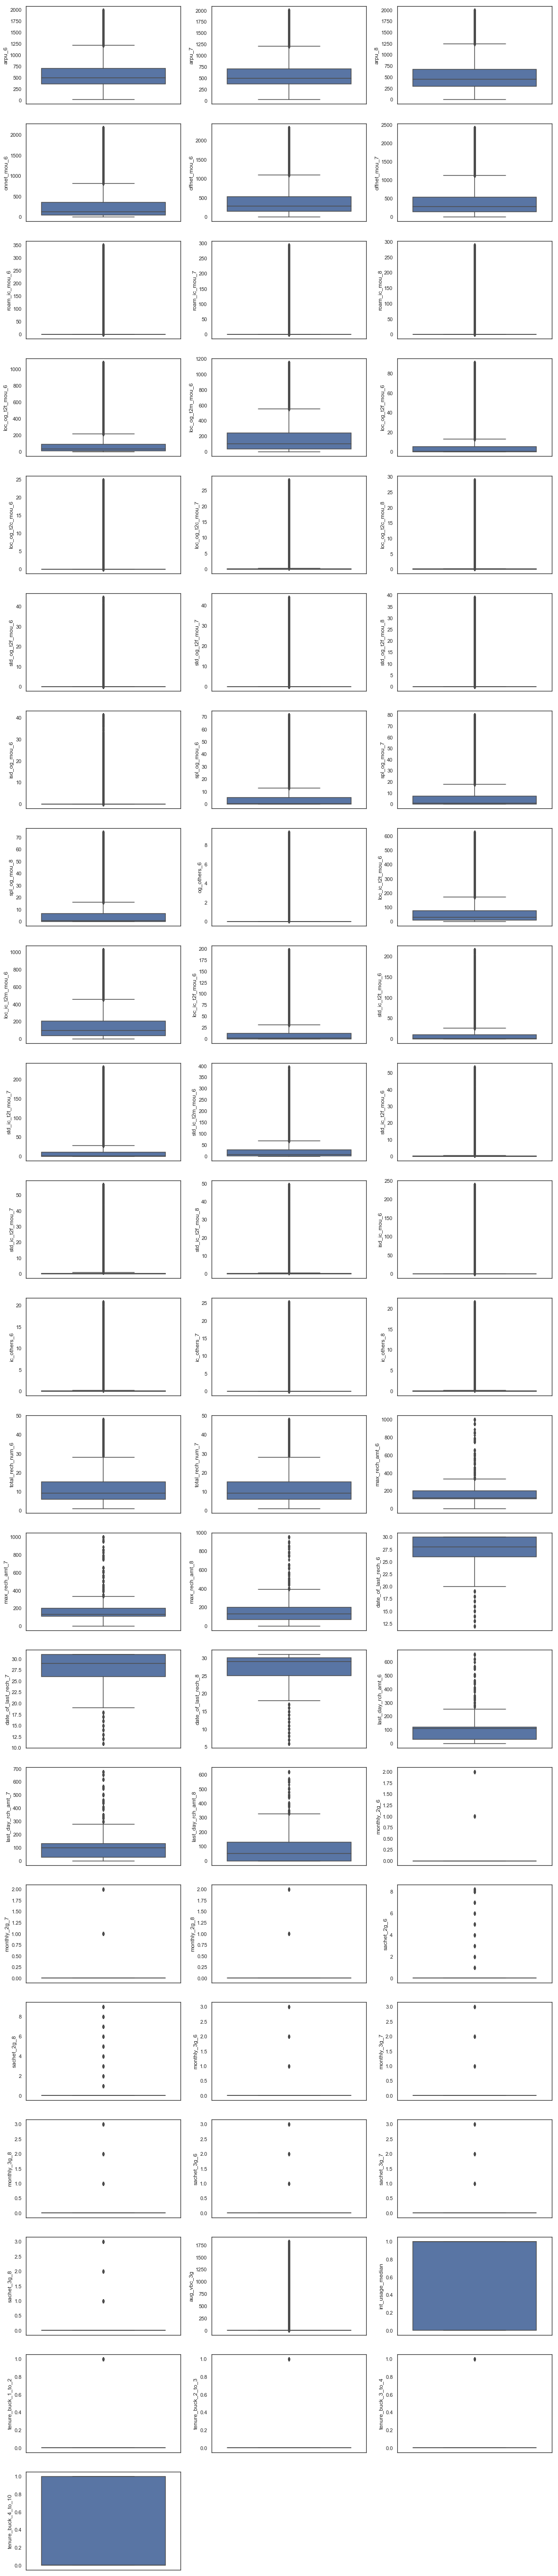

In [32]:
cont_cols = [col for col in new_telecom_df3.columns if col not in ['churn','mobile_number']]
# fig, axs = plt.subplots(22,3, figsize=(15, 25), facecolor='w', edgecolor='k')
i = 1 
plt.figure(figsize=(20,100))
for col in cont_cols:
#     plt.figure(figsize=(5, 5))
    plt.subplot(22,3,i)
    sns.boxplot(y=col, data=new_telecom_df3)
    i = i + 1

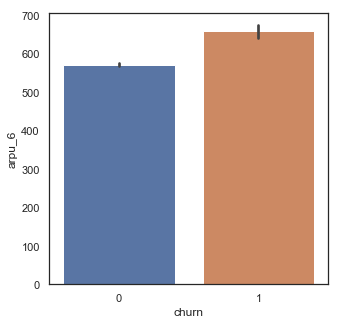

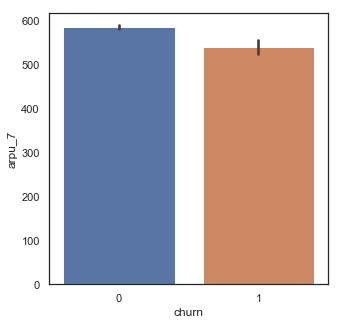

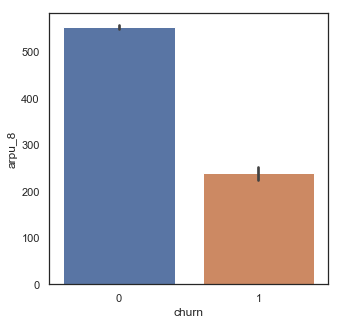

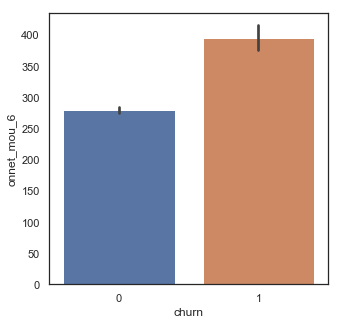

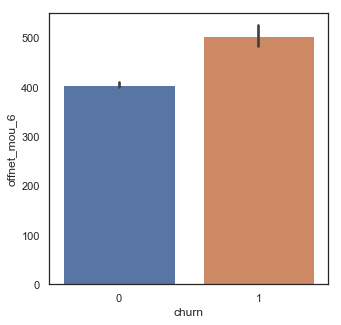

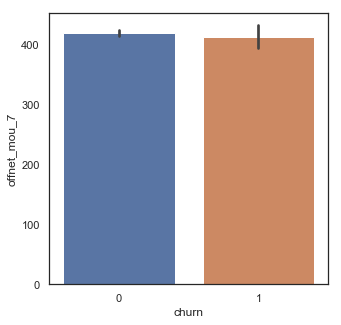

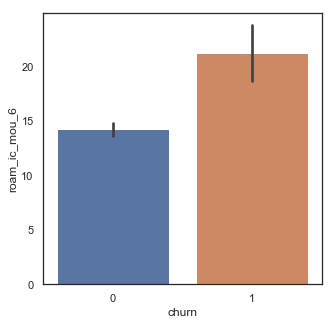

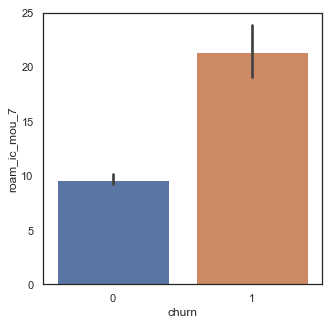

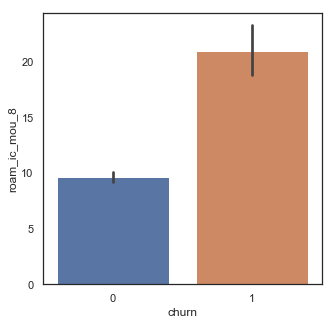

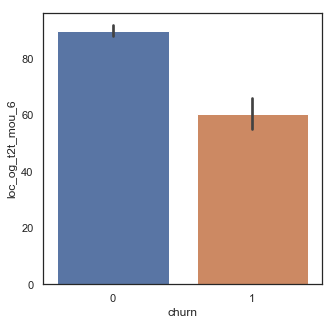

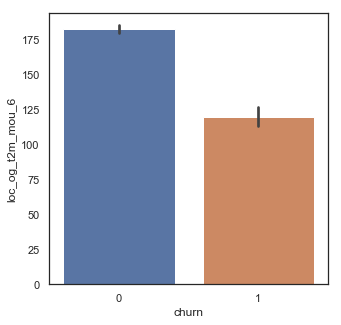

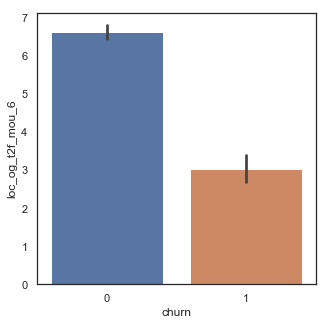

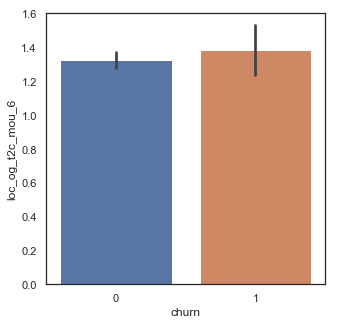

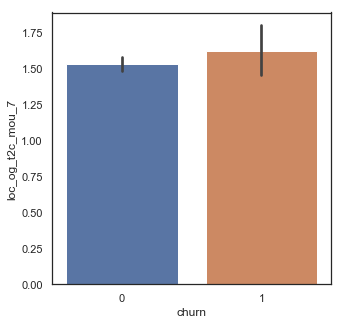

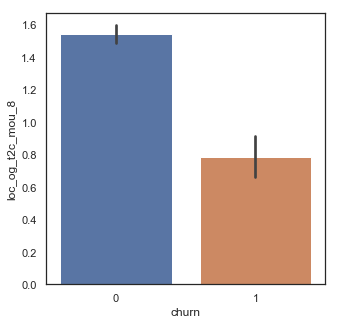

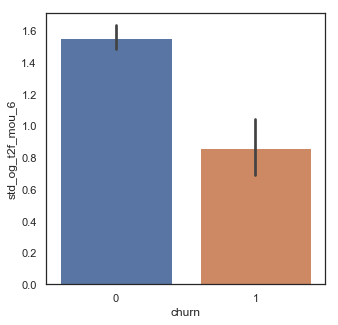

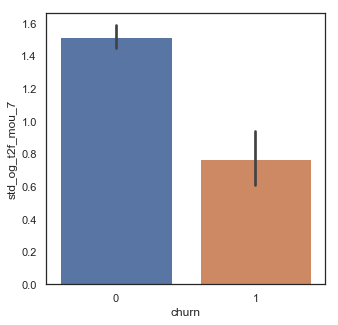

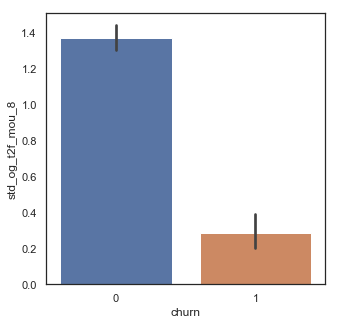

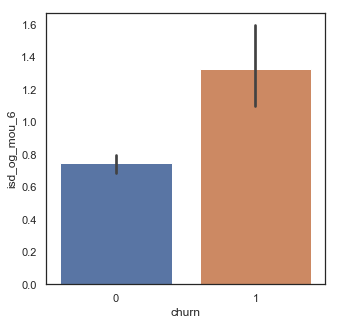

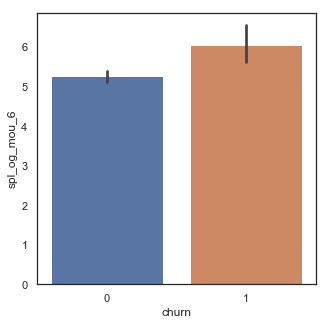

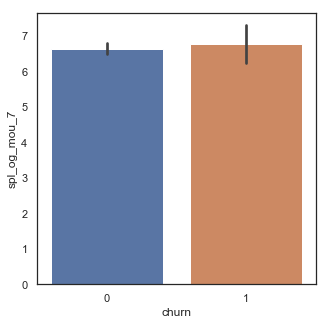

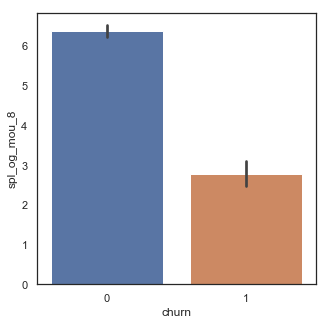

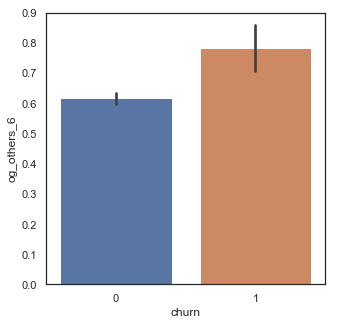

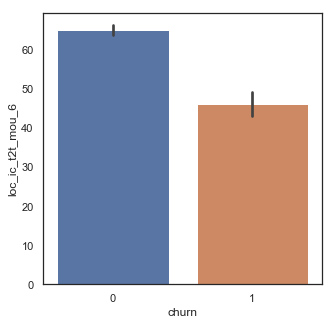

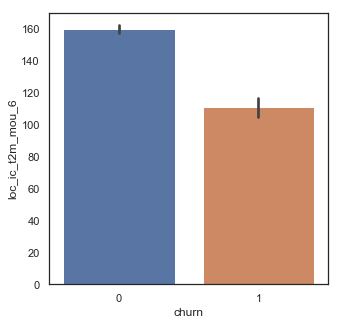

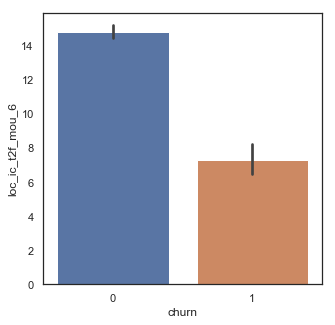

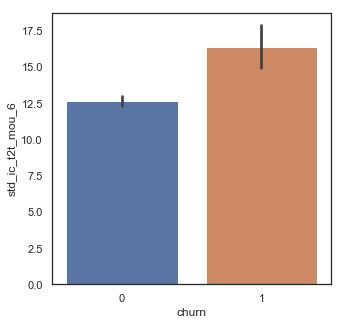

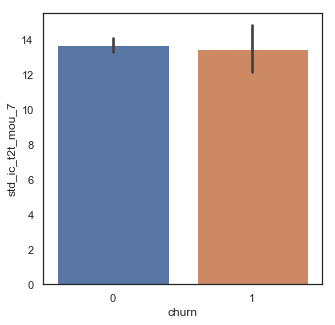

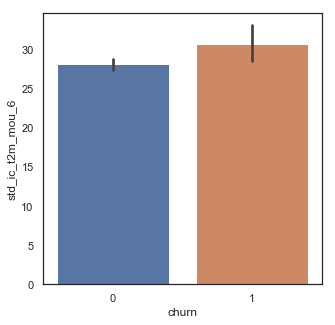

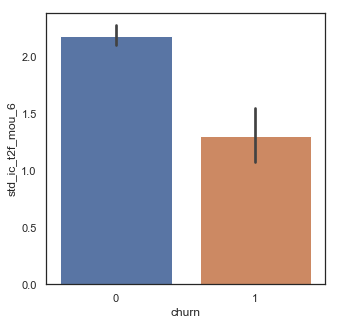

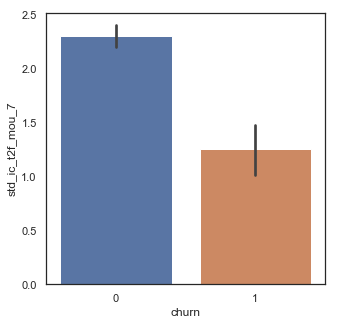

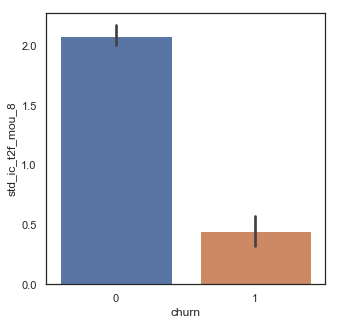

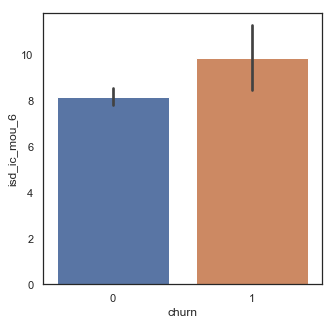

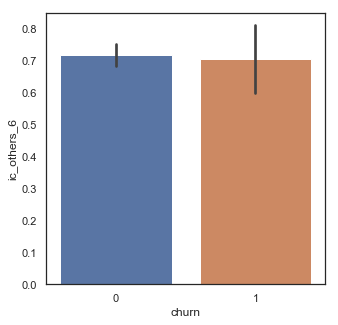

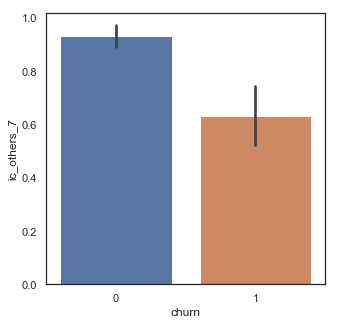

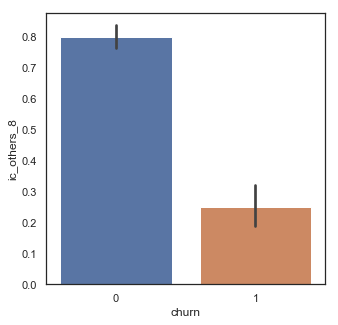

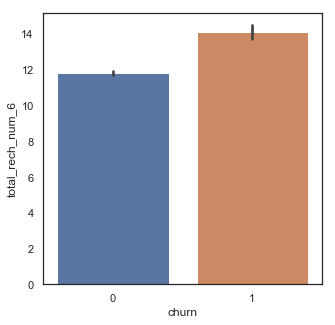

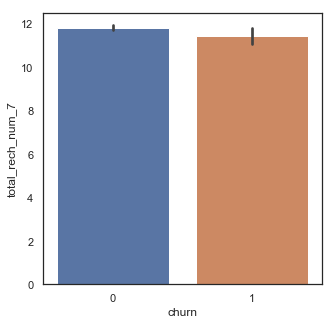

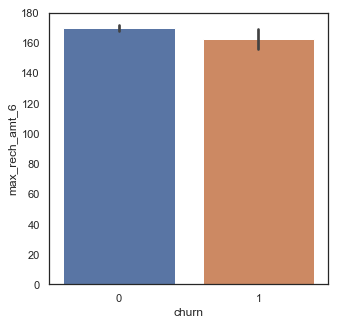

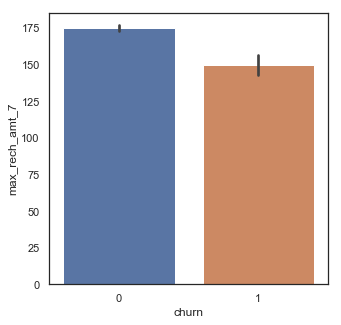

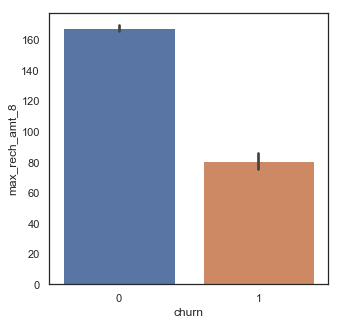

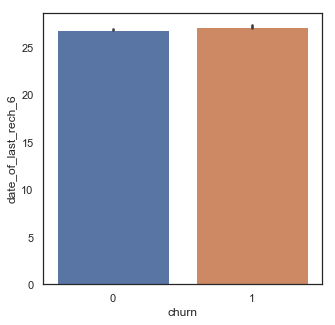

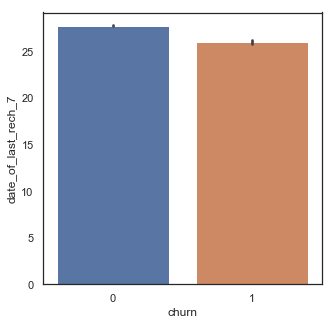

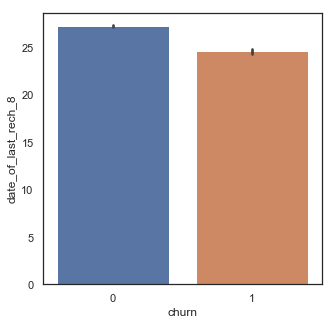

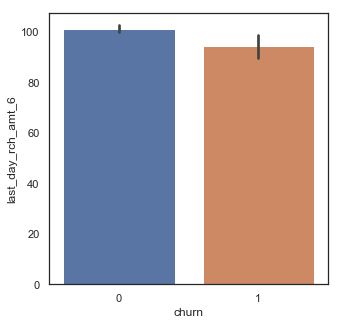

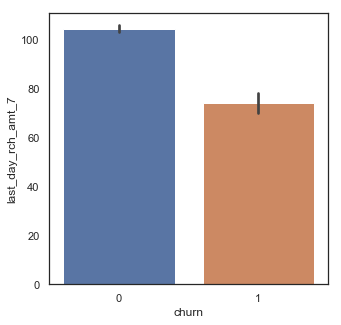

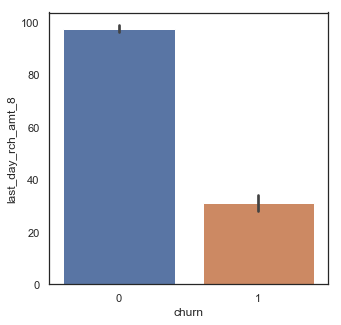

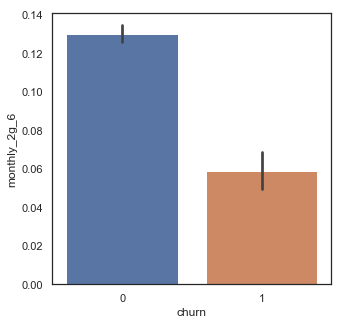

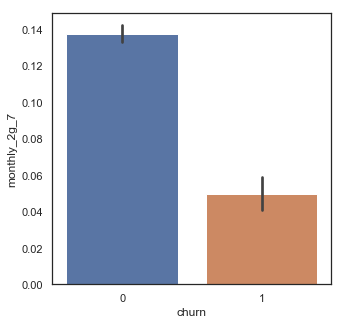

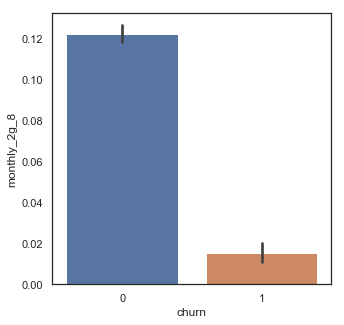

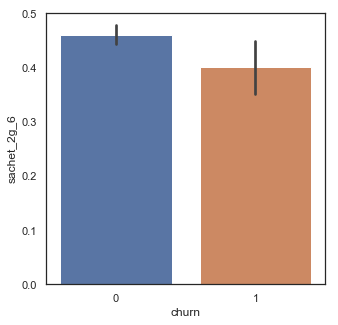

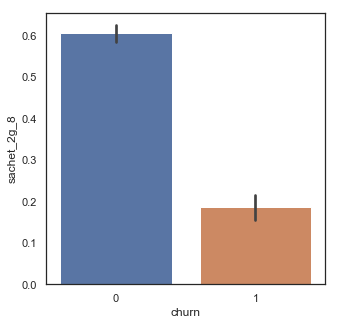

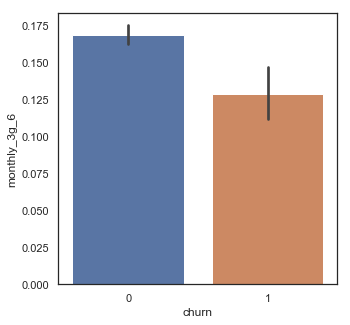

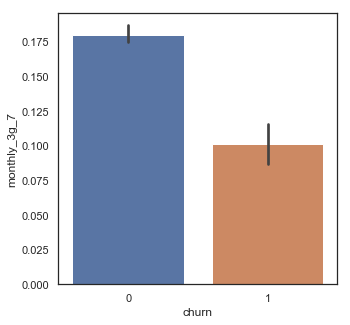

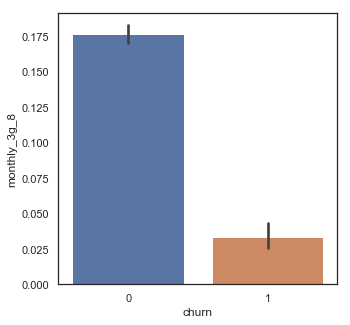

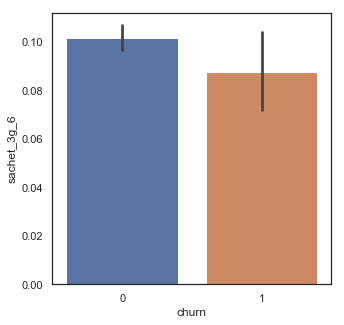

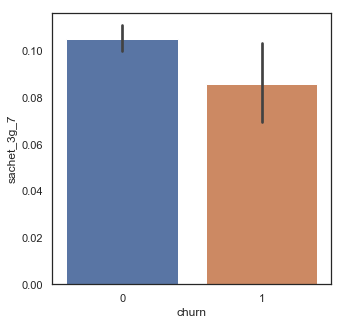

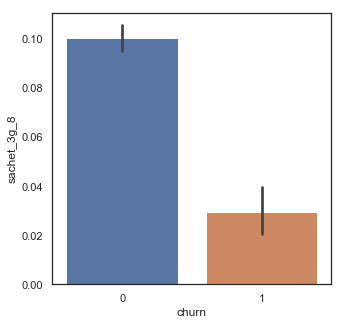

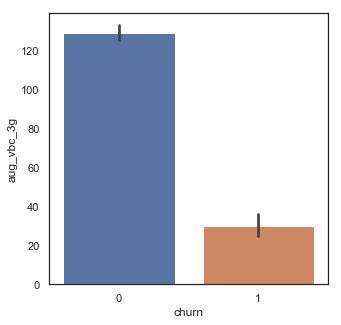

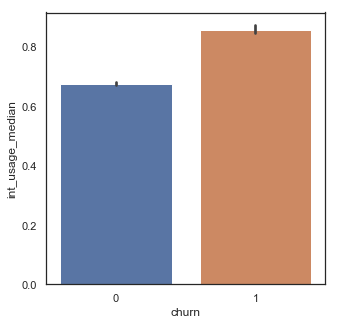

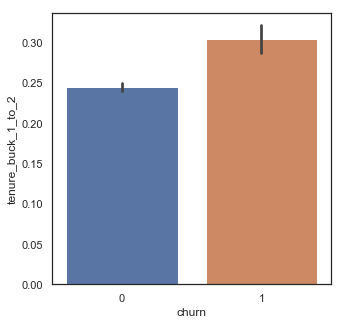

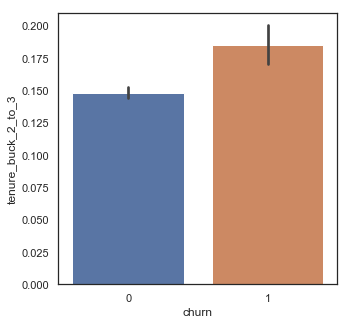

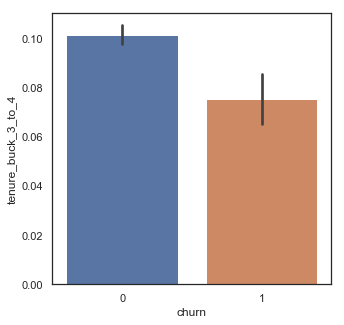

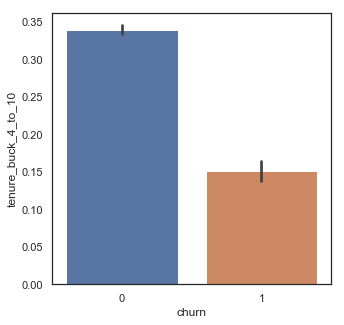

In [33]:
cont_cols = [col for col in new_telecom_df3.columns if col not in ['churn','mobile_number']]
i = 1 
# plt.figure(figsize=(20,100))
for col in cont_cols:
    plt.figure(figsize=(5, 5))
#     plt.subplot(22,3,i)
    sns.barplot(x='churn', y=col, data=new_telecom_df3)
    plt.show()
#     i = i + 1

[Text(0, 0.5, '(%)')]

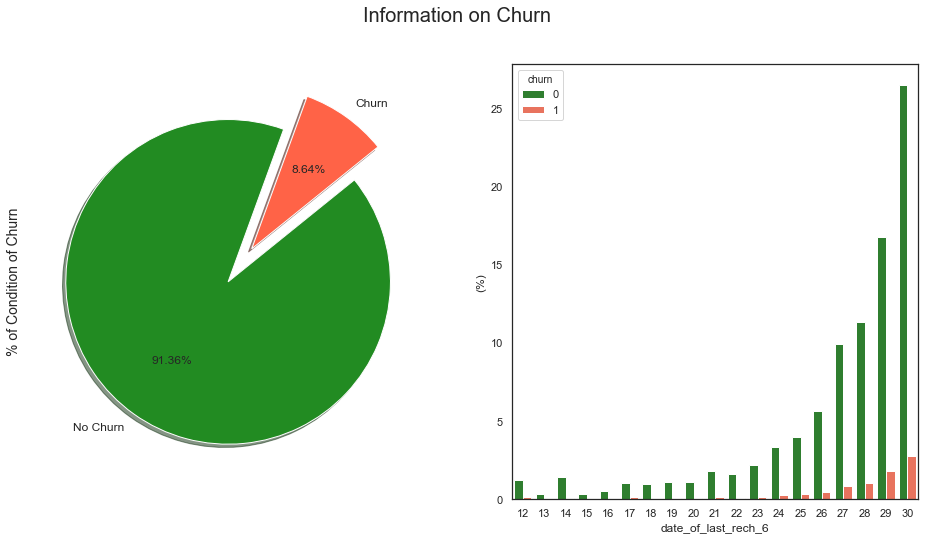

In [34]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

new_telecom_df3["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=new_telecom_df3, palette=palette, estimator=lambda x: len(x) / len(new_telecom_df3) * 100)
ax[1].set(ylabel="(%)")


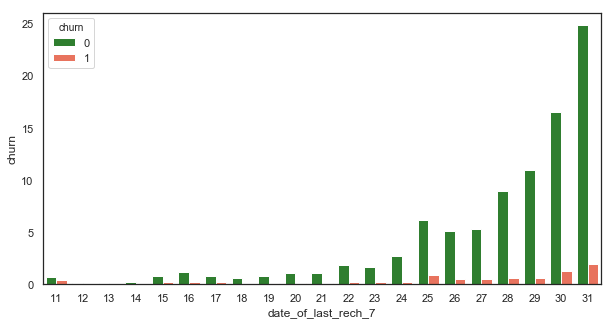

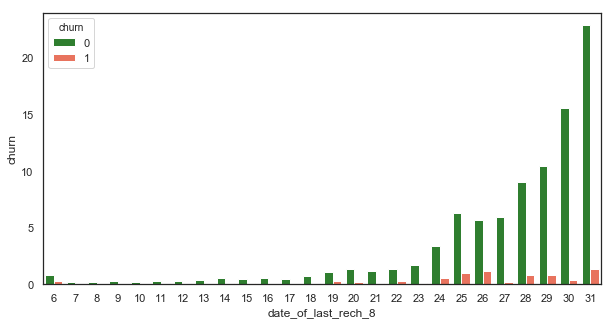

In [35]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=new_telecom_df3, palette=palette, 
            estimator=lambda x: len(x) / len(new_telecom_df3) * 100)

plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=new_telecom_df3, palette=palette, 
            estimator=lambda x: len(x) / len(new_telecom_df3) * 100)

## Model Building:

In [36]:
new_telecom_df4 = new_telecom_df3
new_telecom_df4.head()

mobile_number    arpu_6     arpu_7      arpu_8  onnet_mou_6  offnet_mou_6  \
7      7000701601  1069.180  1349.8500  1988.08226        57.84        453.43   
8      7001524846   378.721   492.2230   137.36200       413.69         94.66   
13     7002191713   492.846   205.6710   593.26000       501.76        413.31   
16     7000875565   430.975   299.8690   187.89400        50.51        296.29   
17     7000187447   690.008    25.6006    25.49900      1185.91         61.64   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7        567.160          16.23          33.49          31.64   
8         80.630           0.00           0.00           0.00   
13       119.280          23.53         144.24          72.11   
16       229.740           0.00           2.83           0.00   
17         1.099           0.00           4.76           4.81   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
7              51.39            308.63             62.13               0.0   
8             297.13             80.96              0.00               0.0   
13             49.63            151.13              4.54               0.0   
16             42.61            273.29              0.00               0.0   
17             38.99             58.54              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7                0.0              0.00              6.66             20.08   
8                0.0              7.15              0.00              0.00   
13               0.0              0.49              0.00              0.00   
16               0.0              0.00              0.00              0.00   
17               0.0              0.00              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7              16.68           0.0          4.50          0.00          6.50   
8               0.00           0.0          0.00          0.00         10.23   
13              0.00           0.0          0.00          0.00          4.78   
16              0.00           0.0          0.00          3.26          5.91   
17              0.00           0.0          2.58          0.00          0.00   

    og_others_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
7          0.00             58.14            217.56            152.16   
8          0.00             23.84             57.58              0.00   
13         0.00             67.88            142.88              4.81   
16         0.00             41.33            226.81              8.71   
17         0.93             34.54             47.41              0.00   

    std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
7              36.89             11.83             91.44             52.19   
8               0.00              0.58             22.43              0.00   
13            115.68             38.29            308.13              0.00   
16             68.79             78.64             18.68              0.51   
17              8.63              0.00              1.28              0.00   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  isd_ic_mou_6  ic_others_6  \
7              34.24             22.21         2.060      15.7400   
8               0.00              0.00         0.000       0.0000   
13              0.00              1.91       239.192      20.7408   
16              0.00              2.18         0.000       0.0000   
17              0.00              0.00         0.000       0.0000   

    ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
7         15.19        15.14                 5                 5   
8          0.00         0.00                19                21   
13        16.24        21.44                 6                 4   
16         0.00         0.00                10                 6   
17         0.00         0.00                

###### Splitting Data into Training and Test Sets

In [37]:
# Putting feature variable to X
X = new_telecom_df4.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = new_telecom_df4['churn']

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
7   0.534739  0.670877  1.000000     0.026693      0.194390      0.234889   
8   0.183426  0.236395  0.069093     0.190915      0.040222      0.033002   
13  0.241494  0.091225  0.298408     0.231559      0.177150      0.049040   
16  0.210013  0.138947  0.094510     0.023310      0.126865      0.094876   
17  0.341812  0.000000  0.012826     0.547290      0.026033      0.000000   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  loc_og_t2t_mou_6  \
7        0.046432       0.114358       0.109657          0.047732   
8        0.000000       0.000000       0.000000          0.275980   
13       0.067316       0.492536       0.249916          0.046097   
16       0.000000       0.009664       0.000000          0.039577   
17       0.000000       0.016254       0.016670          0.036215   

    loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7           0.268883          0.683540               0.0               0.0   
8           0.070534          0.000000               0.0               0.0   
13          0.131667          0.049948               0.0               0.0   
16          0.238094          0.000000               0.0               0.0   
17          0.051001          0.000000               0.0               0.0   

    loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7           0.000000          0.149929          0.457072           0.42849   
8           0.247557          0.000000          0.000000           0.00000   
13          0.016965          0.000000          0.000000           0.00000   
16          0.000000          0.000000          0.000000           0.00000   
17          0.000000          0.000000          0.000000           0.00000   

    isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
7            0.0      0.063041      0.000000      0.087659     0.000000   
8            0.0      0.000000      0.000000      0.137962     0.000000   
13           0.0      0.000000      0.000000      0.064463     0.000000   
16           0.0      0.000000      0.040793      0.079702     0.000000   
17           0.0      0.036144      0.000000      0.000000     0.099845   

    loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  std_ic_t2t_mou_6  \
7           0.092945          0.211929          0.771168          0.171040   
8           0.038112          0.056090          0.000000          0.000000   
13          0.108516          0.139182          0.024378          0.536350   
16          0.066072          0.220940          0.044144          0.318945   
17          0.055217          0.046183          0.000000          0.040013   

    std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
7           0.051143          0.232122          0.977323          0.604889   
8           0.002507          0.056939          0.000000          0.000000   
13          0.165535          0.782194          0.000000          0.000000   
16          0.339976          0.047420          0.009550          0.000000   
17          0.000000          0.003249          0.000000          0.000000   

    std_ic_t2f_mou_8  isd_ic_mou_6  ic_others_6  ic_others_7  ic_others_8  \
7           0.449504      0.008612     0.758891     0.601189     0.703205   
8           0.000000      0.000000     0.000000     0.000000     0.000000   
13          0.038656      1.000000     1.000000     0.642746     0.995820   
16          0.044121      0.000000     0.000000     0.000000     0.000000   
17          0.000000      0.000000     0.000000     0.000000     0.000000   

    total_rech_num_6  total_rech_num_7  max_rech_amt_6  max_rech_amt_7  \
7           0.085106          0.085106            1.00           0.790   
8           0.382979          0.425532            0.09           0.154   
13          0.106383          0.063830            0.11           0.110   
16          0.191489          0.106383    

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

In [39]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
88105  0.000000  0.318336  0.495754     0.059293      0.122439      0.547088   
34588  0.165576  0.248705  0.080834     0.021455      0.040274      0.039952   
16623  0.447941  0.239461  0.260758     0.038332      0.194029      0.197079   
54904  0.216612  0.335464  0.514340     0.094740      0.109479      0.520013   
33555  0.230981  0.144170  0.227419     0.001966      0.486148      0.294634   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  loc_og_t2t_mou_6  \
88105       0.000000            0.0            0.0          0.030967   
34588       0.000000            0.0            0.0          0.029481   
16623       0.000000            0.0            0.0          0.076609   
54904       0.000000            0.0            0.0          0.114765   
33555       0.002947            0.0            0.0          0.003957   

       loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
88105          0.090197          0.004181               0.0          0.184136   
34588          0.078418          0.052368               0.0          0.000000   
16623          0.347667          0.348646               0.0          0.000000   
54904          0.190413          0.022334               0.0          0.004603   
33555          0.007693          0.000000               0.0          0.000000   

       loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
88105          0.008656               0.0               0.0               0.0   
34588          0.000000               0.0               0.0               0.0   
16623          0.000000               0.0               0.0               0.0   
54904          0.000000               0.0               0.0               0.0   
33555          0.000000               0.0               0.0               0.0   

       isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
88105           0.0      0.003642      0.065068      0.079028          0.0   
34588           0.0      0.000000      0.000000      0.000000          0.0   
16623           0.0      0.329355      0.233119      0.062440          0.0   
54904           0.0      0.023956      0.025151      0.085097          0.0   
33555           0.0      0.000000      0.000000      0.000000          0.0   

       loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  std_ic_t2t_mou_6  \
88105          0.047448          0.093038          0.010440          0.005239   
34588          0.031189          0.067351          0.074198          0.030786   
16623          0.043899          0.143614          0.258120          0.000000   
54904          0.215592          0.148855          0.000000          0.002921   
33555          0.009400          0.028746          0.000000          0.021328   

       std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
88105          0.008171          0.018658          0.000000          0.000000   
34588          0.004583          0.004214          0.000000          0.000000   
16623          0.006269          0.002031          0.007116          0.012543   
54904          0.092127          0.019394          0.000000          0.000000   
33555          0.000000          0.053258          0.000000          0.000000   

       std_ic_t2f_mou_8  isd_ic_mou_6  ic_others_6  ic_others_7  ic_others_8  \
88105          0.000000      0.000000     0.000000     0.000000     0.000000   
34588          0.000000      0.000000     0.000000     0.000000     0.000000   
16623          0.063955      0.288513     0.000000     0.003562     0.016256   
54904          0.000000      0.000000     0.000000     0.000000     0.000000   
33555          0.000000      0.000000     0.045803     0.000000     0.000000   

       total_rech_num_6  total_rech_num_7  max_rech_amt_6  max_rech_amt_7  \
88105          0.000000          0.638298           0.000           0.110   
34588          0.170213          0.255319  

In [40]:
X_train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6  offnet_mou_6  \
count  20985.000000  20985.000000  20985.000000  20985.000000  20985.000000   
mean       0.285473      0.281495      0.264907      0.134619      0.177548   
std        0.170681      0.171611      0.186962      0.188377      0.180577   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.176634      0.172760      0.146764      0.020140      0.060792   
50%        0.243772      0.237380      0.228593      0.059293      0.122439   
75%        0.350251      0.343381      0.338909      0.164767      0.225699   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  20985.000000   20985.000000   20985.000000   20985.000000   
mean       0.173098       0.043174       0.036512       0.036541   
std        0.177604       0.147659       0.139520       0.139942   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.058443       0.000000       0.000000       0.000000   
50%        0.118067       0.000000       0.000000       0.000000   
75%        0.221196       0.000000       0.000000       0.000000   
max        1.000000       1.000000       1.000000       1.000000   

       loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
count      20985.000000      20985.000000      20985.000000      20985.000000   
mean           0.081486          0.153803          0.068452          0.053420   
std            0.151215          0.185641          0.158664          0.158863   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.008294          0.028036          0.000000          0.000000   
50%            0.030967          0.090197          0.004181          0.000000   
75%            0.085136          0.208595          0.056219          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
count      20985.000000      20985.000000      20985.000000      20985.000000   
mean           0.055553          0.051396          0.033396          0.032660   
std            0.161364          0.153397          0.135275          0.134187   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.003895          0.002077          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       std_og_t2f_mou_8  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  \
count      20985.000000  20985.000000  20985.000000  20985.000000   
mean           0.032119      0.019174      0.075045      0.083838   
std            0.133785      0.117026      0.162200      0.167843   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      0.000000      0.003642      0.010386   
75%            0.000000      0.000000      0.073268      0.089969   
max            1.000000      1.000000      1.000000      1.000000   

       spl_og_mou_8   og_others_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
count  20985.000000  20985.000000      20985.000000      20985.000000   
mean       0.081538      0.067400          0.101085          0.151779   
std        0.164841      0.174786          0.157395          0.179841   
min        0.000000      0.000000          0.000000          0.000000   
25%        0.000000      0.000000          0.014244          0.034416   
50%        0.009170      0.000000          0.047448          0.093038   
75%        0.086715      0.000000          0.117548          0.196928   
max        1.000000   

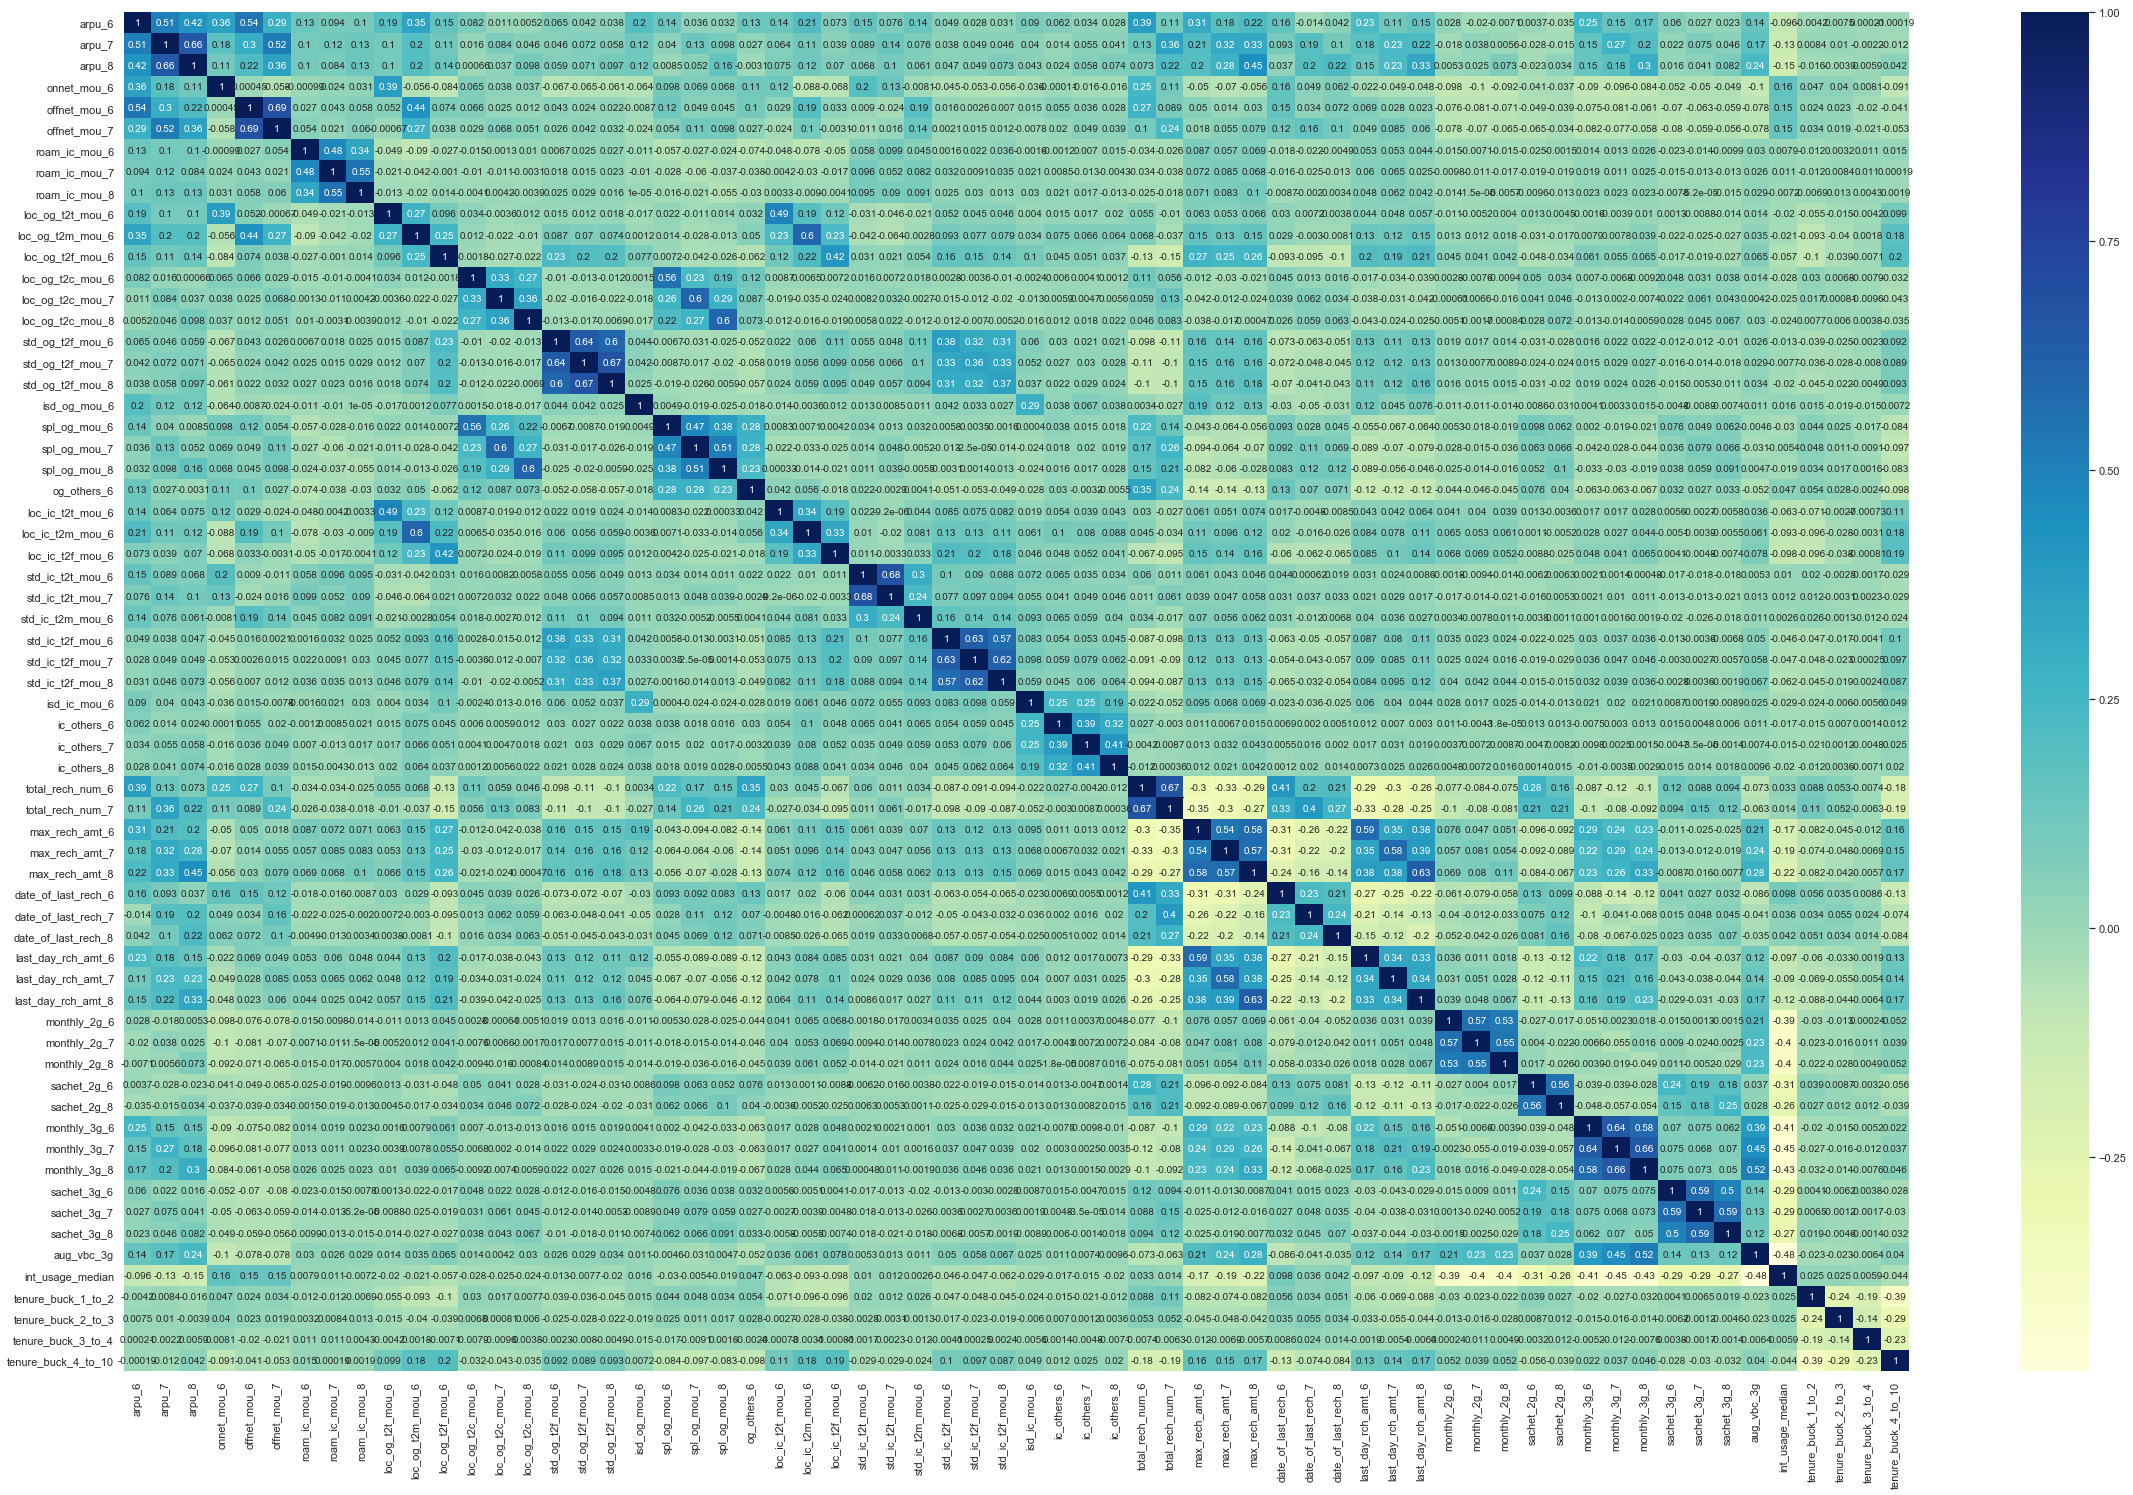

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 25))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### PCA

In [42]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [43]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head()

[[ 2.72571622e-02  3.06854554e-02  5.65711713e-02 ... -1.09443676e-01
  -3.84465767e-02  6.33309364e-01]
 [ 4.18919185e-02  6.04983344e-02  6.45280251e-02 ...  2.57138042e-02
   2.31317494e-02 -4.20050004e-01]
 [ 8.86256922e-03  9.48370467e-03  4.45679598e-03 ...  6.41718066e-01
   1.67836011e-01 -2.97419368e-01]
 ...
 [ 2.69357152e-01  3.88331192e-01 -2.99271458e-01 ... -4.22804574e-03
  -6.00330154e-03 -6.33031438e-03]
 [ 4.63600978e-02  2.09811249e-01 -5.38352863e-02 ...  3.89643721e-03
   9.19224613e-04  1.58662910e-04]
 [-5.87486566e-01  4.24434348e-01  1.24821513e-02 ... -8.03315916e-04
   3.30260691e-03  3.77712162e-03]]


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.027257  0.041892  0.008863 -0.025435  0.335408  0.044947 -0.024222   
1  0.030685  0.060498  0.009484 -0.020675  0.347231  0.045479  0.079954   
2  0.056571  0.064528  0.004457 -0.009289  0.346802  0.049026  0.088463   
3 -0.065349 -0.031810  0.015726 -0.059189  0.123000  0.019024  0.060688   
4 -0.032633 -0.034933  0.001565 -0.038711  0.307944  0.029847 -0.160777   

        PC8       PC9      PC10       Feature  
0 -0.080813  0.004581 -0.160256        arpu_6  
1 -0.089717 -0.175575  0.102712        arpu_7  
2 -0.094216 -0.195551  0.167722        arpu_8  
3 -0.006283 -0.035818 -0.103210   onnet_mou_6  
4 -0.064776 -0.027720 -0.153454  offnet_mou_6

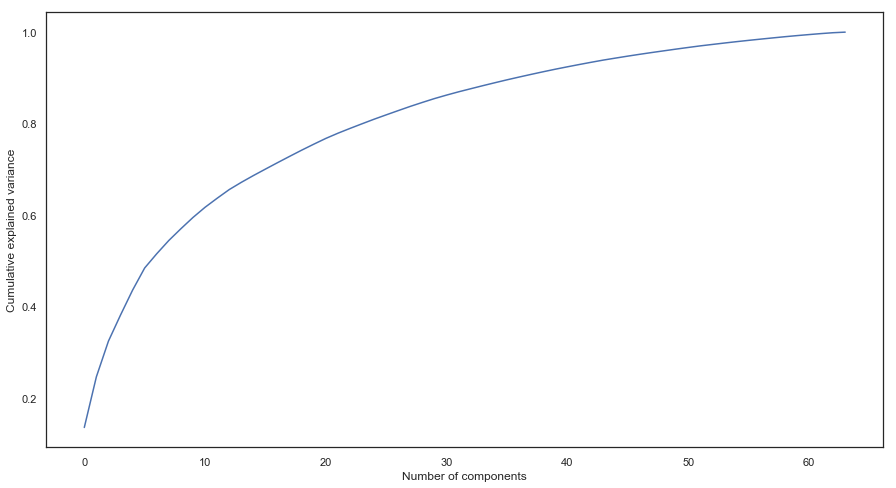

In [44]:
# Ploting figure
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

- Above we can see that 40 components explain 90% of variance in the data set.

In [45]:
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 40)

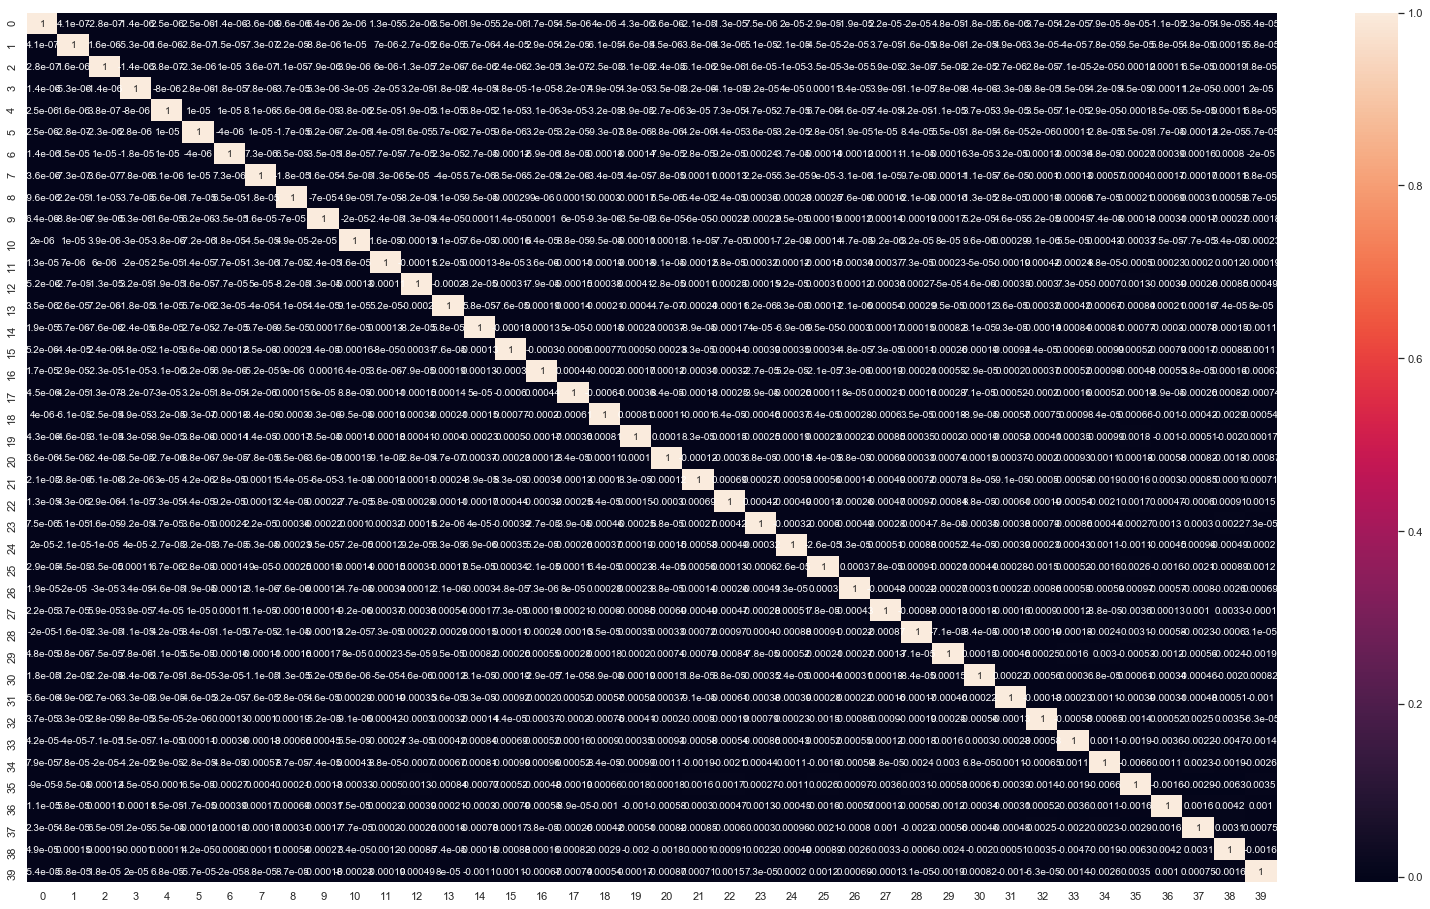

In [46]:
# Creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (28,16))
sns.heatmap(corrmat,annot = True)

In [47]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.004195136733311874 , min corr:  -0.006584089476799978


- Above we can see that correlations are indeed very close to 0 or 0.

In [48]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 40)

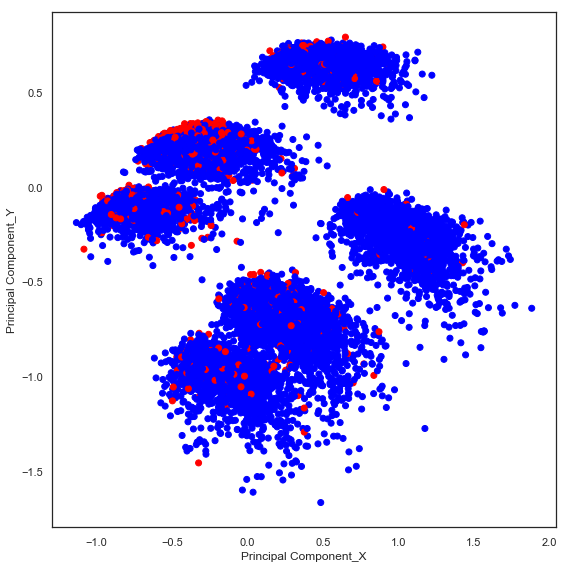

In [49]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'blue',1:'red'}))
plt.xlabel('Principal Component_X')
plt.ylabel('Principal Component_Y')
plt.tight_layout()
plt.show()

### Logistic Regression model with PCA
>We perform logistic regression lets do the modeling with selected 40 pca feature 
>We also needs to do the class imbalance with class_width = balanced

In [50]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Prediction on test data

In [51]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [52]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [53]:
# printing classification_report
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6640 1539]
 [ 160  655]]
0.8110962864131643


In [54]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8675113657076292


### ROC Curve with PCA Data

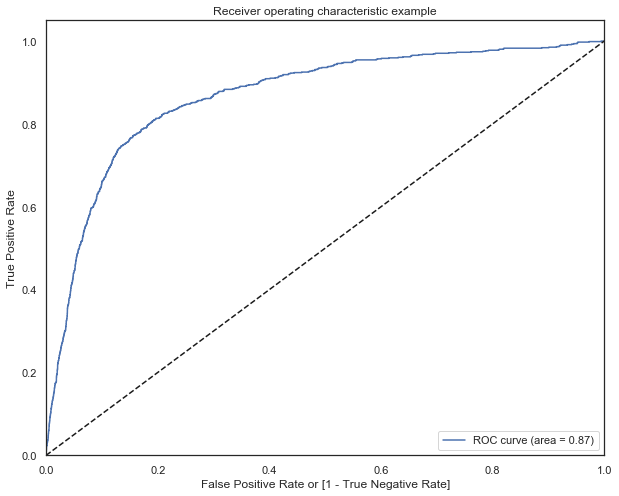

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99676285e+00, 9.96762854e-01, 9.94132630e-01, ...,
        1.58964475e-04, 6.82972306e-05, 2.73188479e-05]))

In [56]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.02f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [57]:
# Createing columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.048430    1    0    0    0    0    0    0    0    0    0
1      0    0.165277    1    1    0    0    0    0    0    0    0    0
2      0    0.158918    1    1    0    0    0    0    0    0    0    0
3      0    0.281130    1    1    1    0    0    0    0    0    0    0
4      0    0.512729    1    1    1    1    1    1    0    0    0    0

##### Accuracy, Sensitivity and Specificity

In [58]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.326773  0.262379  0.973006
0.2   0.2  0.503224  0.458858  0.948466
0.3   0.3  0.633311  0.605820  0.909202
0.4   0.4  0.739048  0.727351  0.856442
0.5   0.5  0.811096  0.811835  0.803681
0.6   0.6  0.863909  0.878102  0.721472
0.7   0.7  0.886702  0.914904  0.603681
0.8   0.8  0.904603  0.950972  0.439264
0.9   0.9  0.910496  0.979337  0.219632


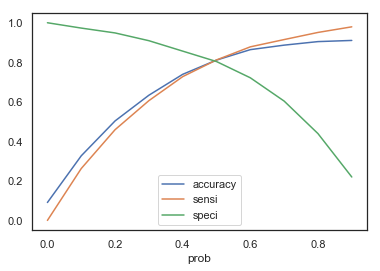

In [59]:
# Ploting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [60]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.49317652876595197]


###### Creating new column

In [61]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

##### Confusion Matrix 

In [62]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6590, 1589],
       [ 155,  660]])

### Logistic Regression model  with PCA 

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8110962864131643
Sensitivity:  0.8098159509202454
Specificity:  0.8057219709010881
false postive rate:  0.19427802909891184
positive predictive value:  0.2934637616718542
Negative predictive value:  0.9770200148257969
Misclassification Rate:  0.1939070491438737


### LogistcRegression model with RFE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
rfe = RFE(logreg, 10)             # running RFE with 40 variables as output as PCA gave 40
rfe = rfe.fit(X_norm,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True  True False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True False
 False  True False  True False False  True False False False False False
 False False False False]
[ 1  1  1 26 24 55 20 19  1  7  1  4 37 43 29 32 17  9 25 52 30  6 51 31
 54 13 38 40 39 48 27  2 12 53 47  8 45 44 21  5 50 34 10  1 33 16  1 18
 46  1 28  1 35 23  1 49 15 14  3 36 41 42 22 11]


In [65]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [66]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

##### Correlation Matrix

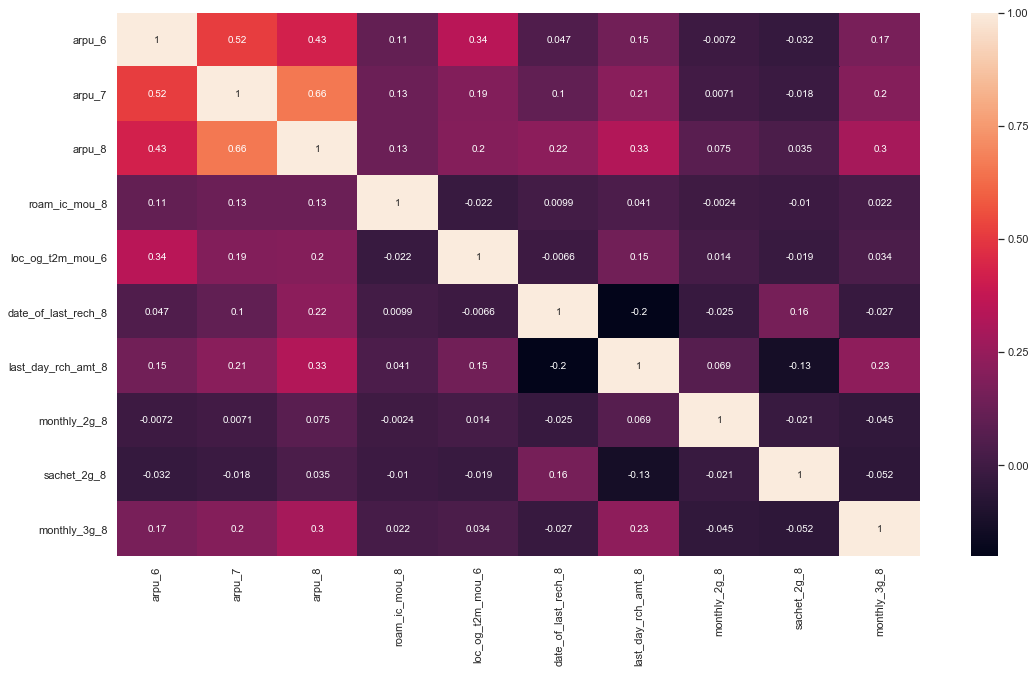

In [67]:
# Correlation matrix 
plt.figure(figsize = (18,10))        
sns.heatmap(X_norm[col].corr(),annot = True)

### VIF Value

In [68]:
col_for_vif = list(col)
col_for_vif.append('churn')
vif_cal(input_data=new_telecom_df3[col_for_vif], dependent_col='churn')

Var   Vif
1               arpu_7  7.78
2               arpu_8  6.24
0               arpu_6  5.86
5  date_of_last_rech_8  5.15
4     loc_og_t2m_mou_6  1.95
6   last_day_rch_amt_8  1.94
9         monthly_3g_8  1.26
8          sachet_2g_8  1.19
7         monthly_2g_8  1.12
3        roam_ic_mou_8  1.10

- VIF looks good now will select these coloum for creating LogisticRegression

In [69]:
# Run the model
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

###### ROC_AUC score

In [70]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [71]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8179
           1       0.30      0.81      0.44       815

   micro avg       0.81      0.81      0.81      8994
   macro avg       0.64      0.81      0.66      8994
weighted avg       0.92      0.81      0.85      8994

[[6646 1533]
 [ 158  657]]
accuracy_score :  0.811985768289971


In [72]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

ROC_AUC Score:  0.864190726362666


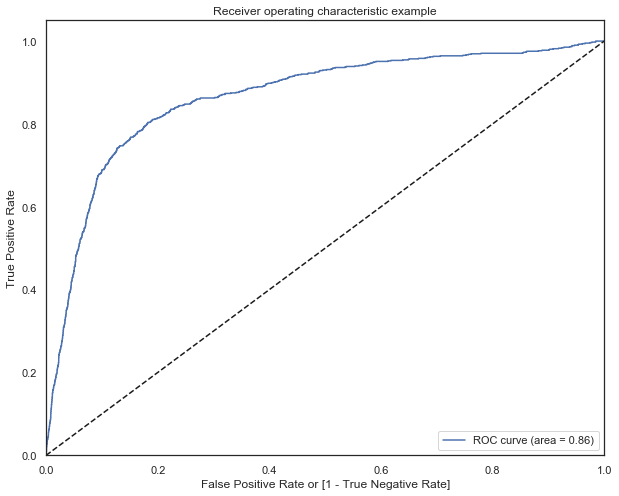

(array([0.00000000e+00, 1.22264335e-04, 1.22264335e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00122699, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99839364e+00, 9.98393645e-01, 9.96290683e-01, ...,
        3.51657468e-05, 3.21121556e-05, 9.70538500e-06]))

In [73]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [74]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.041416    1    0    0    0    0    0    0    0    0    0
1      0    0.152339    1    1    0    0    0    0    0    0    0    0
2      0    0.336398    1    1    1    1    0    0    0    0    0    0
3      0    0.146260    1    1    0    0    0    0    0    0    0    0
4      0    0.504970    1    1    1    1    1    1    0    0    0    0

In [75]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.293863  0.226556  0.969325
0.2   0.2  0.455415  0.406040  0.950920
0.3   0.3  0.599956  0.569140  0.909202
0.4   0.4  0.725039  0.711334  0.862577
0.5   0.5  0.811986  0.812569  0.806135
0.6   0.6  0.862797  0.876024  0.730061
0.7   0.7  0.890371  0.917838  0.614724
0.8   0.8  0.905826  0.955618  0.406135
0.9   0.9  0.911385  0.984717  0.175460


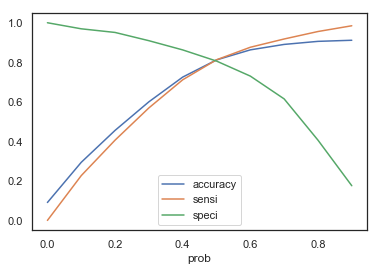

In [76]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [77]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.4953272513629906]


In [78]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

In [79]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6584, 1595],
       [ 153,  662]])

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.811985768289971
Sensitivity:  0.8122699386503067
Specificity:  0.8049883848881282
false postive rate:  0.19501161511187187
positive predictive value:  0.2933097031457687
Negative predictive value:  0.9772895947751224


##### As we can see Above LogisticRegression giving good Accuracy with PCA and with RFE

###### With PCA
<ul>
    <li>Accuracy Score on test data: 0.8110962864131643</li>
    <li>Sensitivity: 0.8098159509202454</li>
    <li>Specificity: 0.8057219709010881</li>
    <li>false postive rate: 0.19427802909891184</li>
    <li>positive predictive value: 0.2934637616718542</li>
    <li>Negative predictive value: 0.9770200148257969</li>
    <li>Misclassification Rate: 0.1939070491438737</li>
</ul> 

###### With RFE
  <ul>
    <li>Accuracy Score : 0.811985768289971</li>
    <li>Sensitivity: 0.8122699386503067</li>
    <li>Specificity: 0.8049883848881282</li>
    <li>false postive rate: 0.19501161511187187</li>
    <li>positive predictive value: 0.2933097031457687</li>
    <li>Negative predictive value: 0.9772895947751224</li>
</ul>

### DecisionTree Classifier With PCA

In [85]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
# Check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.81      0.87      8179
           1       0.24      0.62      0.35       815

   micro avg       0.79      0.79      0.79      8994
   macro avg       0.60      0.71      0.61      8994
weighted avg       0.89      0.79      0.83      8994

[[6586 1593]
 [ 308  507]]
Acuracy Score 0.7886368690237936


In [87]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7886368690237936
Sensitivity:  0.6220858895705521
Specificity:  0.8052329135591149
false postive rate:  0.1947670864408852
positive predictive value:  0.24142857142857144
Negative predictive value:  0.955323469683783
Misclassification Rate:  0.21136313097620635


- As we can see above Sensitivity of model is not great let's tune the Hyperparameter

### Hyper Parameter

In [90]:
# Hyper parameterss
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [91]:
y_train.shape

(20985,)

In [92]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.097902      0.003225         0.001171        0.000192   
1       0.179555      0.001511         0.001074        0.000015   
2       0.257186      0.001716         0.001138        0.000047   
3       0.333663      0.001698         0.001181        0.000036   
4       0.406212      0.002408         0.001201        0.000026   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.627680           0.553014   
1               2  {'max_depth': 2}           0.804907           0.741959   
2               3  {'max_depth': 3}           0.750834           0.684060   
3               4  {'max_depth': 4}           0.704383           0.665714   
4               5  {'max_depth': 5}           0.754169           0.764355   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.487253           0.506552           0.542421         0.543388   
1           0.752680           0.751727           0.770496         0.764355   
2           0.652371           0.595425           0.700191         0.676579   
3           0.753395           0.733143           0.749285         0.721182   
4           0.736478           0.699309           0.713775         0.733619   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.048391               39            0.618216            0.547713   
1        0.022271               32            0.806815            0.747736   
2        0.051576               38            0.753976            0.697284   
3        0.032648               37            0.717400            0.679414   
4        0.024274               35            0.769047            0.786395   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.492078            0.524541            0.550658   
1            0.745056            0.763641            0.762642   
2            0.659876            0.607279            0.698553   
3            0.772695            0.747260            0.752933   
4            0.758697            0.716702            0.720591   

   mean_train_score  std_train_score  
0          0.546641         0.041487  
1          0.765178         0.022143  
2          0.683394         0.048479  
3          0.733940         0.032517  
4          0.750286         0.027336

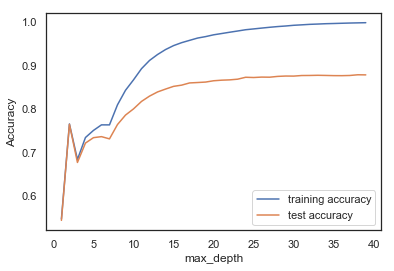

In [93]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
# Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [95]:
# Scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.824326      0.032596         0.001667        0.000311   
1       0.706319      0.043011         0.001420        0.000062   
2       0.749410      0.048780         0.001512        0.000127   
3       0.655814      0.053554         0.001420        0.000085   
4       0.617385      0.020478         0.001366        0.000093   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.834683   
1                     25  {'min_samples_leaf': 25}           0.770605   
2                     45  {'min_samples_leaf': 45}           0.748452   
3                     65  {'min_samples_leaf': 65}           0.730110   
4                     85  {'min_samples_leaf': 85}           0.743687   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.836312           0.845366           0.841077           0.844614   
1           0.784846           0.760305           0.772933           0.774071   
2           0.750298           0.719562           0.741482           0.737369   
3           0.734811           0.724327           0.726233           0.758580   
4           0.721468           0.731475           0.744103           0.757388   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.840410        0.004296                1            0.933520   
1         0.772552        0.007841                2            0.833562   
2         0.739433        0.010979                4            0.791327   
3         0.734811        0.012413                5            0.763865   
4         0.739624        0.012232                3            0.772979   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.936741            0.942280            0.940851   
1            0.839886            0.816595            0.822016   
2            0.796640            0.773529            0.779366   
3            0.774124            0.765487            0.763939   
4            0.756731            0.765309            0.775375   

   split4_train_score  mean_train_score  std_train_score  
0            0.935910          0.937860         0.003236  
1            0.812794          0.824970         0.010231  
2            0.775746          0.783322         0.009060  
3            0.784502          0.770383         0.008017  
4            0.776342          0.769347         0.007402

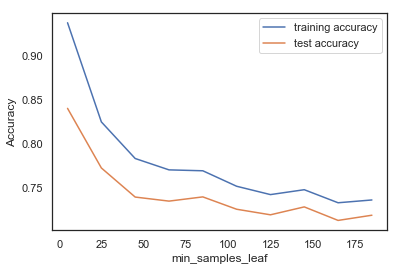

In [96]:
# Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [97]:
# Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [98]:
# Scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.872256      0.038928         0.001748        0.000094   
1       0.826721      0.034686         0.001497        0.000109   
2       0.798814      0.027072         0.001670        0.000130   
3       0.782690      0.025798         0.001684        0.000039   
4       0.763896      0.027501         0.001679        0.000041   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.874940   
1                      25  {'min_samples_split': 25}           0.830872   
2                      45  {'min_samples_split': 45}           0.807527   
3                      65  {'min_samples_split': 65}           0.785136   
4                      85  {'min_samples_split': 85}           0.770605   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.867286           0.874672           0.881344           0.876072   
1           0.833452           0.828687           0.832499           0.825786   
2           0.803908           0.789850           0.796998           0.793136   
3           0.778175           0.768883           0.774124           0.774547   
4           0.757684           0.757446           0.757208           0.758818   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.874863        0.004493                1            0.995354   
1         0.830260        0.002759                2            0.935962   
2         0.798284        0.006578                3            0.893072   
3         0.776173        0.005373                4            0.855126   
4         0.760353        0.005157                5            0.829630   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.994341            0.995592            0.992912   
1            0.932928            0.927686            0.927389   
2            0.890100            0.879974            0.875983   
3            0.850905            0.846200            0.845306   
4            0.822135            0.827913            0.821658   

   split4_train_score  mean_train_score  std_train_score  
0            0.993746          0.994389         0.000998  
1            0.926202          0.930033         0.003761  
2            0.867294          0.881285         0.009404  
3            0.834475          0.846402         0.006927  
4            0.814224          0.823112         0.005433

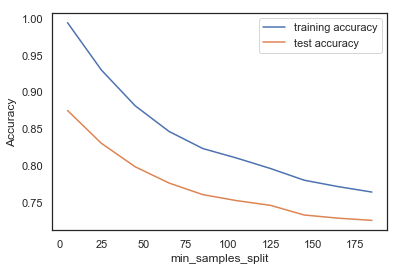

In [99]:
# Plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  9.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(5, 200, 20), 'min_samples_split': range(5, 200, 20), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [101]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7920419347152728
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [102]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [103]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6541, 1638],
       [ 307,  508]])

In [104]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6233128834355828
Specificity:  0.7997310184619146
false postive rate:  0.20026898153808534
positive predictive value:  0.23671947809878843
Negative predictive value:  0.9551693925233645
Misclassification Rate:  0.21625528129864355


### RandomForest Classifier with PCA

In [105]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [106]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8129,   50],
       [ 746,   69]])

In [107]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.08466257668711656
Specificity:  0.9938867832253332
false postive rate:  0.006113216774666829
positive predictive value:  0.5798319327731093
Negative predictive value:  0.915943661971831
Misclassification Rate:  0.08850344674227263


In [108]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [109]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.377952      0.017425         0.012192        0.002003   
1       0.950241      0.018374         0.011118        0.000771   
2       1.258865      0.009685         0.012428        0.000503   
3       1.236296      0.100860         0.011462        0.001905   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.739638           0.696926   
1               7   {'max_depth': 7}           0.853025           0.857994   
2              12  {'max_depth': 12}           0.901858           0.906123   
3              17  {'max_depth': 17}           0.910672           0.910174   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.753634           0.708840           0.773594         0.734525   
1           0.864665           0.857517           0.858913         0.858423   
2           0.908744           0.908030           0.906816         0.906314   
3           0.915654           0.914939           0.915634         0.913414   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.028251                4            0.759755            0.693472   
1        0.003724                3            0.886162            0.884501   
2        0.002408                2            0.966641            0.967894   
3        0.002461                1            0.983261            0.982666   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.765309            0.713784            0.774138   
1            0.890338            0.884084            0.888677   
2            0.961758            0.967536            0.967300   
3            0.983441            0.983858            0.981119   

   mean_train_score  std_train_score  
0          0.741291         0.031749  
1          0.886752         0.002413  
2          0.966226         0.002271  
3          0.982869         0.000955

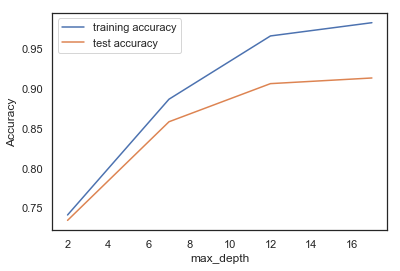

In [110]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [111]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [112]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.555421      0.235901         0.099900        0.004782   
1      57.352953      0.297000         0.460508        0.015611   
2     102.863410      0.179530         0.856952        0.084718   
3     134.626791     15.254412         0.984892        0.163356   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.899952   
1                500   {'n_estimators': 500}           0.899714   
2                900   {'n_estimators': 900}           0.900429   
3               1300  {'n_estimators': 1300}           0.900191   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.906600           0.914463           0.907553           0.910867   
1           0.907315           0.914701           0.909459           0.909676   
2           0.907553           0.914224           0.908268           0.911582   
3           0.908030           0.914463           0.908744           0.911821   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.907887        0.004835                4            0.960684   
1         0.908173        0.004875                3            0.958897   
2         0.908411        0.004655                2            0.959969   
3         0.908649        0.004813                1            0.959850   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.957112            0.960388            0.955206   
1            0.959733            0.959614            0.957112   
2            0.959435            0.959912            0.955861   
3            0.959435            0.959793            0.956278   

   split4_train_score  mean_train_score  std_train_score  
0            0.958663          0.958411         0.002054  
1            0.961046          0.959280         0.001287  
2            0.961105          0.959257         0.001784  
3            0.960867          0.959245         0.001558

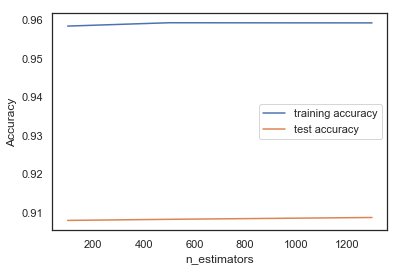

In [113]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [114]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [115]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.046434      0.033677         0.017076        0.002931   
1       1.749951      0.101429         0.014244        0.003821   
2       2.652360      0.082436         0.011705        0.000339   
3       3.588945      0.033816         0.012130        0.000526   
4       3.942817      0.400417         0.009867        0.001396   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.888042   
1                  8   {'max_features': 8}           0.888995   
2                 14  {'max_features': 14}           0.887089   
3                 20  {'max_features': 20}           0.894474   
4                 24  {'max_features': 24}           0.889948   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.889683           0.903741           0.894210           0.892278   
1           0.896593           0.900167           0.897784           0.898236   
2           0.895163           0.903026           0.898022           0.899905   
3           0.896593           0.899690           0.901120           0.900143   
4           0.893972           0.900167           0.898975           0.902288   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.893591        0.005499                5            0.945791   
1         0.896355        0.003856                4            0.946447   
2         0.896640        0.005418                3            0.948412   
3         0.898404        0.002481                1            0.947340   
4         0.897069        0.004490                2            0.950438   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.940731            0.943710            0.936860   
1            0.942995            0.948594            0.945735   
2            0.948475            0.949011            0.944842   
3            0.949369            0.945735            0.949071   
4            0.946629            0.950381            0.943710   

   split4_train_score  mean_train_score  std_train_score  
0            0.937638          0.940946         0.003429  
1            0.945857          0.945926         0.001790  
2            0.950384          0.948225         0.001834  
3            0.944726          0.947248         0.001815  
4            0.951695          0.948570         0.002964

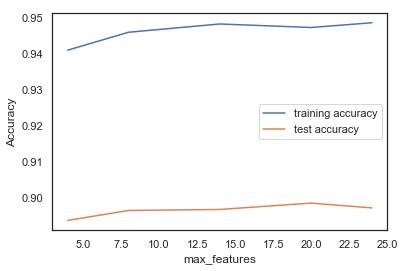

In [116]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 10

In [117]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [118]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.933242      0.015761         0.011410        0.000623   
1       0.854638      0.015027         0.011233        0.001166   
2       0.791668      0.016696         0.010924        0.000405   
3       0.760726      0.012635         0.011227        0.001649   
4       0.716402      0.011899         0.010345        0.000656   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.827299   
1                    150  {'min_samples_leaf': 150}           0.811577   
2                    200  {'min_samples_leaf': 200}           0.803716   
3                    250  {'min_samples_leaf': 250}           0.807527   
4                    300  {'min_samples_leaf': 300}           0.800619   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.821301           0.826305           0.827972           0.837226   
1           0.807482           0.829164           0.829164           0.816254   
2           0.798666           0.813438           0.795330           0.823880   
3           0.796521           0.797713           0.811056           0.809819   
4           0.795092           0.777222           0.801525           0.824595   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.828020        0.005164                1            0.847918   
1         0.818728        0.008962                2            0.825996   
2         0.807005        0.010419                3            0.821231   
3         0.804527        0.006167                4            0.819920   
4         0.799809        0.015167                5            0.815333   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.850846            0.850846            0.848165   
1            0.830057            0.834227            0.838694   
2            0.819931            0.824458            0.810341   
3            0.812545            0.806469            0.816953   
4            0.803848            0.782166            0.811592   

   split4_train_score  mean_train_score  std_train_score  
0            0.842337          0.848022         0.003108  
1            0.821609          0.830117         0.005997  
2            0.829293          0.821051         0.006254  
3            0.809399          0.813057         0.004885  
4            0.821848          0.806957         0.013694

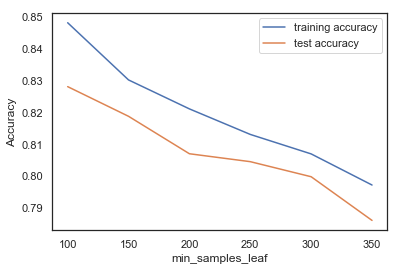

In [119]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [120]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [121]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.695293      0.093620         0.007075        0.000133   
1       0.628944      0.012446         0.007006        0.000410   
2       0.599912      0.011360         0.006614        0.000063   
3       0.583027      0.003452         0.006547        0.000081   
4       0.567647      0.007559         0.006447        0.000090   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.848261   
1                     250  {'min_samples_split': 250}           0.843973   
2                     300  {'min_samples_split': 300}           0.841353   
3                     350  {'min_samples_split': 350}           0.829919   
4                     400  {'min_samples_split': 400}           0.824678   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.850131           0.859423           0.851084           0.860105   
1           0.841792           0.836788           0.847272           0.847235   
2           0.834644           0.833214           0.841315           0.829600   
3           0.835835           0.840839           0.826305           0.836034   
4           0.812247           0.832976           0.821539           0.817922   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.853800        0.004958                1            0.877405   
1         0.843412        0.003907                2            0.872163   
2         0.836026        0.004636                3            0.867457   
3         0.833786        0.005098                4            0.854947   
4         0.821873        0.006921                6            0.840055   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.881284            0.880510            0.873660   
1            0.870324            0.858768            0.868120   
2            0.858470            0.861032            0.860972   
3            0.858113            0.862938            0.841792   
4            0.835716            0.852454            0.828330   

   split4_train_score  mean_train_score  std_train_score  
0            0.882363          0.879044         0.003158  
1            0.863065          0.866488         0.004917  
2            0.856632          0.860913         0.003664  
3            0.854965          0.854551         0.007016  
4            0.839002          0.839111         0.007832

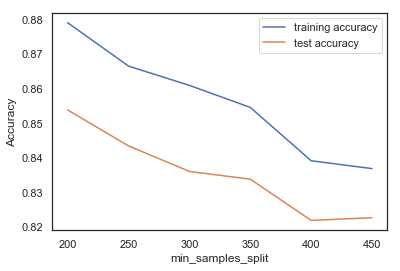

In [122]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [123]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [124]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 18.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [8, 10], 'min_samples_leaf': range(100, 200, 100), 'min_samples_split': range(200, 400, 100), 'n_estimators': range(200, 400, 100), 'max_features': [8, 10, 12]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [125]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8533714558017632 using {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [126]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [127]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [128]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [129]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8179
           1       0.35      0.67      0.46       815

   micro avg       0.86      0.86      0.86      8994
   macro avg       0.66      0.77      0.69      8994
weighted avg       0.91      0.86      0.88      8994

[[7175 1004]
 [ 268  547]]
accuracy_score:   0.8585723815877252


In [130]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7175, 1004],
       [ 268,  547]])

In [131]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8585723815877252
Sensitivity:  0.6711656441717792
Specificity:  0.87724660716469
false postive rate:  0.12275339283530994
positive predictive value:  0.35267569310122504
Negative predictive value:  0.9639930135697972
Misclassification Rate:  0.14142761841227486


#### Recomendation for Model Selection
<li> Logistic Regression and Random Forest performed better than Decision Tree for customer churn analysis for this particular dataset, using PCA.</li>
<li>LogisticRegression is the best model 80.9% Sensitivity</li>
<li>Accuracy of RandomForest is highest with 85%</li>

##### LogisticRegression
<li>Accuracy Score : 0.8110962864131643 (With PCA on Test)</li>
<li>Sensitivity: 0.8098159509202454 (with PCA)</li>
<li>Accuracy Score : 0.811985768289971 (With RFE on Test)</li>
<li>Sensitivity: 0.8122699386503067 (with RFE)</li>

##### RandomForest
<li>Accuracy Score: 0.8570157883033134</li>
<li>Sensitivity: 0.6711656441717792</li>

##### DecisionTree
<li>Sensitivity: 0.6233128834355828 (with PCA)</li>

RandomForest on all feature

In [132]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [133]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [134]:
# Making predictions
predictions = rfc.predict(X_test)

In [135]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8179
           1       0.78      0.38      0.51       815

   micro avg       0.93      0.93      0.93      8994
   macro avg       0.86      0.68      0.74      8994
weighted avg       0.93      0.93      0.92      8994

[[8092   87]
 [ 506  309]]
0.9340671558816989


In [136]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

array([[8092,   87],
       [ 506,  309]])

In [137]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.9340671558816989
Sensitivity:  0.3791411042944785
Specificity:  0.9893630028120797
false postive rate:  0.010636997187920284
positive predictive value:  0.7803030303030303
Negative predictive value:  0.9411491044428937
Misclassification Rate:  0.0659328441183011


### Hyperparameter Tuning

In [138]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)


In [139]:
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [140]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.211660      0.011155         0.010364        0.001350   
1       0.542514      0.022649         0.013615        0.002148   
2       0.723785      0.020376         0.015320        0.000945   
3       0.723856      0.058861         0.013717        0.003230   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.834445           0.868477   
1               7   {'max_depth': 7}           0.893521           0.902311   
2              12  {'max_depth': 12}           0.923535           0.923993   
3              17  {'max_depth': 17}           0.929014           0.927091   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.880867           0.862521           0.860820         0.861425   
1           0.904217           0.893019           0.904909         0.899595   
2           0.931618           0.922087           0.929695         0.926185   
3           0.938528           0.940434           0.936130         0.934239   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.015214                4            0.839638            0.873124   
1        0.005237                3            0.910943            0.915833   
2        0.003754                2            0.964854            0.965928   
3        0.005268                1            0.981176            0.982904   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.882654            0.853228            0.857407   
1            0.912497            0.906004            0.917565   
2            0.962116            0.949845            0.961522   
3            0.980105            0.982368            0.978438   

   mean_train_score  std_train_score  
0          0.861210         0.015135  
1          0.912568         0.004034  
2          0.960853         0.005744  
3          0.980998         0.001606

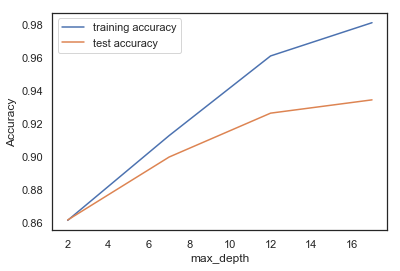

In [141]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#10,12

In [142]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 1000, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [143]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.092801      0.500417         0.153437        0.031022   
1      39.989914      3.158897         0.676671        0.030660   
2      49.605525      8.529427         0.723462        0.193036   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.920438   
1                500  {'n_estimators': 500}           0.919724   
2                900  {'n_estimators': 900}           0.919485   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.924708           0.934715           0.931141           0.927312   
1           0.926138           0.934239           0.931856           0.929218   
2           0.924708           0.933524           0.930188           0.928027   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.927663        0.004958                2            0.958301   
1         0.928234        0.005039                1            0.957050   
2         0.927186        0.004803                3            0.958063   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.956814            0.956993            0.955802   
1            0.959137            0.956040            0.955325   
2            0.958721            0.955742            0.955921   

   split4_train_score  mean_train_score  std_train_score  
0            0.957353          0.957053         0.000809  
1            0.957413          0.956993         0.001301  
2            0.957710          0.957231         0.001189

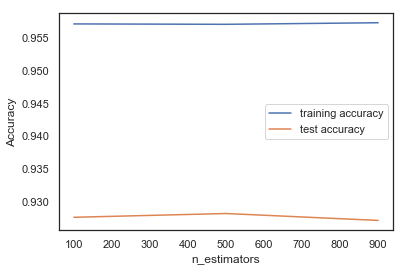

In [144]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [145]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [146]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.213918      0.007485         0.008122        0.000108   
1       0.362359      0.007526         0.007741        0.000087   
2       0.594829      0.008352         0.007793        0.000049   
3       0.837379      0.018192         0.007684        0.000172   
4       0.987263      0.011558         0.007576        0.000109   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.909719   
1                  8   {'max_features': 8}           0.911863   
2                 14  {'max_features': 14}           0.914960   
3                 20  {'max_features': 20}           0.918533   
4                 24  {'max_features': 24}           0.911863   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.908983           0.913271           0.913986           0.914919   
1           0.918751           0.924470           0.921372           0.919685   
2           0.918751           0.930188           0.924470           0.922784   
3           0.912557           0.928520           0.925185           0.922545   
4           0.914701           0.925899           0.926853           0.925405   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.912175        0.002376                5            0.943706   
1         0.919228        0.004166                4            0.948889   
2         0.922230        0.005170                1            0.952642   
3         0.921468        0.005527                2            0.956991   
4         0.920944        0.006338                3            0.947757   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.942102            0.934954            0.934120   
1            0.948058            0.944722            0.946986   
2            0.953181            0.952168            0.950441   
3            0.951334            0.953300            0.953777   
4            0.950083            0.952347            0.953181   

   split4_train_score  mean_train_score  std_train_score  
0            0.936863          0.938349         0.003858  
1            0.947287          0.947188         0.001399  
2            0.953898          0.952466         0.001165  
3            0.951278          0.953336         0.002088  
4            0.954375          0.951549         0.002358

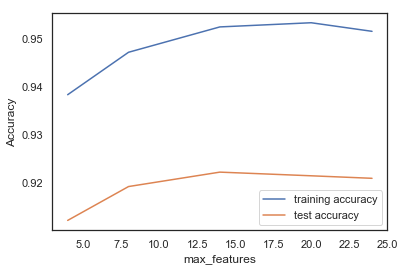

In [147]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [148]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [149]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.360406      0.051376         0.009869        0.001535   
1       0.369496      0.033533         0.010324        0.001432   
2       0.352490      0.014460         0.011456        0.001887   
3       0.294749      0.034190         0.007730        0.000875   
4       0.242757      0.006968         0.007262        0.000289   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.868985   
1                    150  {'min_samples_leaf': 150}           0.866365   
2                    200  {'min_samples_leaf': 200}           0.877323   
3                    250  {'min_samples_leaf': 250}           0.866127   
4                    300  {'min_samples_leaf': 300}           0.857313   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.885633           0.869192           0.882535           0.875834   
1           0.868239           0.857994           0.885156           0.884414   
2           0.868716           0.870622           0.881106           0.877741   
3           0.858947           0.880391           0.864665           0.870114   
4           0.852514           0.870622           0.849416           0.876072   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.876436        0.006784                1            0.880086   
1         0.872433        0.010661                3            0.875916   
2         0.875101        0.004665                2            0.883541   
3         0.868049        0.007136                4            0.876512   
4         0.861187        0.010386                5            0.861679   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.896533            0.876638            0.883905   
1            0.878306            0.862700            0.883071   
2            0.875566            0.871932            0.879319   
3            0.866869            0.876340            0.862044   
4            0.859304            0.871039            0.849357   

   split4_train_score  mean_train_score  std_train_score  
0            0.878015          0.883036         0.007180  
1            0.882542          0.876507         0.007399  
2            0.877420          0.877555         0.003861  
3            0.864912          0.869335         0.005990  
4            0.873489          0.862973         0.008674

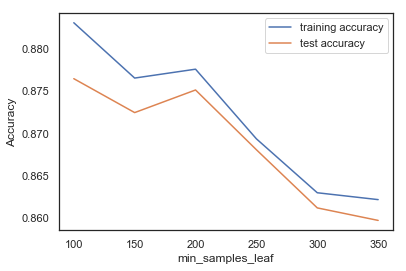

In [150]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [151]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 700, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [152]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.453296      0.047616         0.008415        0.000070   
1       0.401989      0.036863         0.008322        0.000162   
2       0.435680      0.064133         0.009312        0.001833   
3       0.414087      0.051976         0.008595        0.000844   
4       0.361487      0.011850         0.008152        0.000802   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.900905   
1                     150  {'min_samples_split': 150}           0.895426   
2                     200  {'min_samples_split': 200}           0.889233   
3                     250  {'min_samples_split': 250}           0.879228   
4                     300  {'min_samples_split': 300}           0.881134   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.892542           0.914224           0.903979           0.911821   
1           0.889683           0.901835           0.896831           0.901573   
2           0.886109           0.899452           0.886347           0.891087   
3           0.873005           0.882773           0.886586           0.883222   
4           0.876340           0.879914           0.877055           0.891087   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.904694        0.007799                1            0.930303   
1         0.897069        0.004479                2            0.919521   
2         0.890446        0.004870                3            0.908918   
3         0.880963        0.004612                5            0.900042   
4         0.881106        0.005294                4            0.891106   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.923338            0.926674            0.924351   
1            0.912140            0.908566            0.905111   
2            0.899809            0.901537            0.897188   
3            0.889445            0.889445            0.891470   
4            0.891589            0.878961            0.888194   

   split4_train_score  mean_train_score  std_train_score  
0            0.924653          0.925864         0.002470  
1            0.916136          0.912295         0.005148  
2            0.903151          0.902121         0.003931  
3            0.889392          0.891959         0.004118  
4            0.896242          0.889218         0.005741

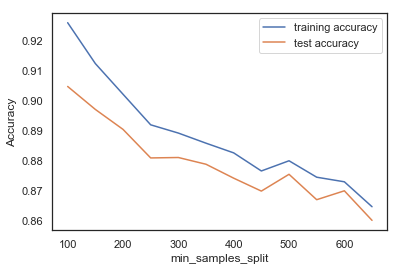

In [153]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [154]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [155]:
# fit
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 17.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 12], 'min_samples_leaf': range(150, 250, 50), 'min_samples_split': range(200, 400, 100), 'n_estimators': [300, 400, 500], 'max_features': [15, 20]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [156]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8753871813199905 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 400}


In [157]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=15,
                             n_estimators=500)

In [158]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=150,
            min_samples_split=300, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [159]:
# predict
predictions = rfc_final.predict(X_test)

In [160]:
from sklearn import metrics
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7152, 1027],
       [ 139,  676]])

In [161]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8703580164554148
Sensitivity:  0.8294478527607362
Specificity:  0.8744345274483433
false postive rate:  0.12556547255165668
positive predictive value:  0.3969465648854962
Negative predictive value:  0.9809353998079824
Misclassification Rate:  0.12964198354458528


### RandomForest model with All feature gives:
> 87% of Accuracy and 82.9% of Sensitivity

In [162]:
#Important Variables
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [165]:
#Variable Importance top 30 variable
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=12
n_items = take(n, dic.items())

In [166]:
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('arpu_8', 0.2527770690596462), ('last_day_rch_amt_8', 0.18464998008079223), ('roam_ic_mou_8', 0.1365627249362814), ('max_rech_amt_8', 0.13139916289352566), ('date_of_last_rech_8', 0.07866901972165204), ('spl_og_mou_8', 0.032745513937579296), ('std_ic_t2f_mou_8', 0.020834286654727384), ('roam_ic_mou_7', 0.013606125060733242), ('loc_og_t2f_mou_6', 0.01285401378362783), ('loc_ic_t2f_mou_6', 0.011058754494718515), ('arpu_7', 0.010130190252608832), ('ic_others_8', 0.009157998884397792)]


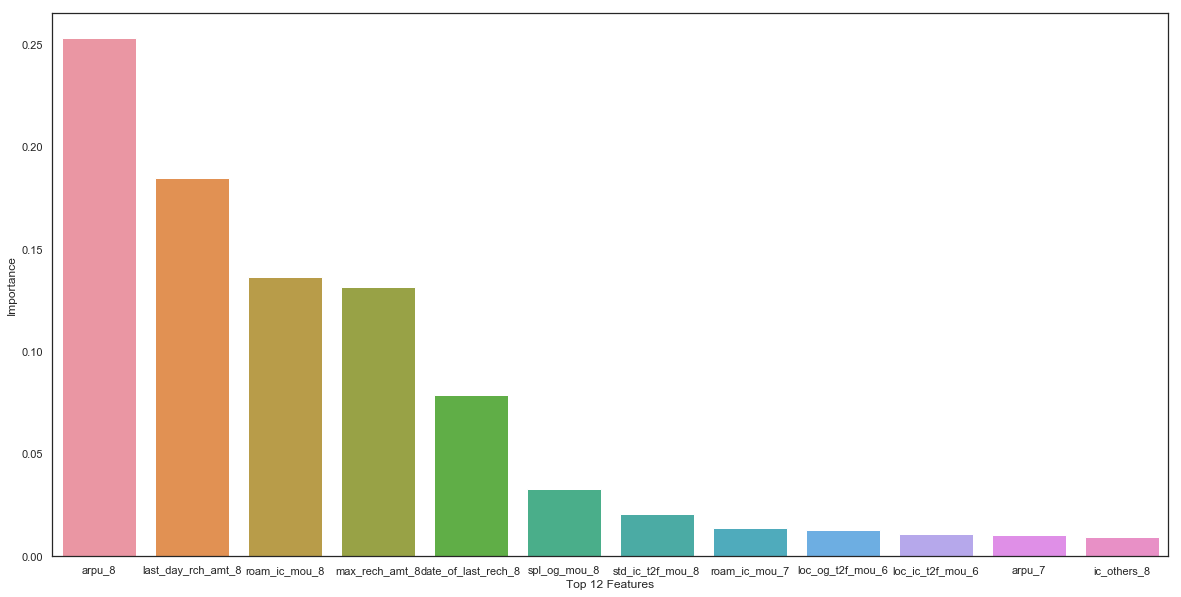

In [167]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

We can see most important features from the above graphs are :
 
 - arpu_8
 - last_day_rch_amt_8
 - roma_ic_mou_8
 - max_rech_amount_8
 - date_of_last_rech_8

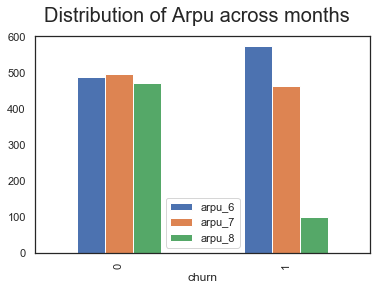

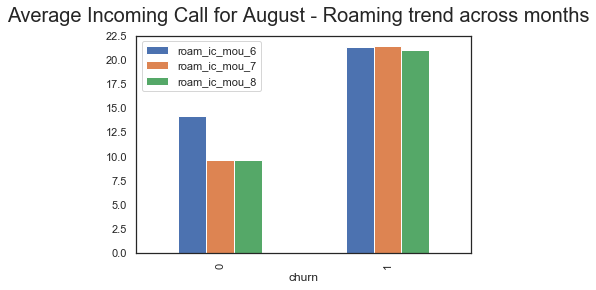

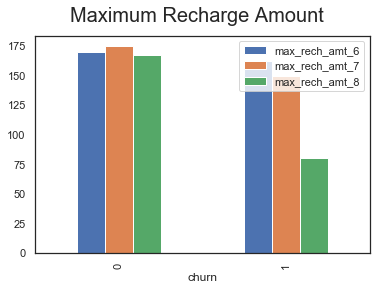

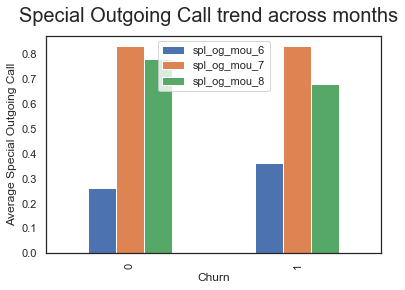

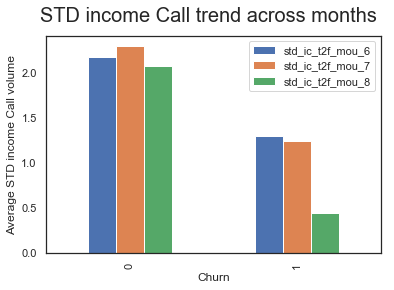

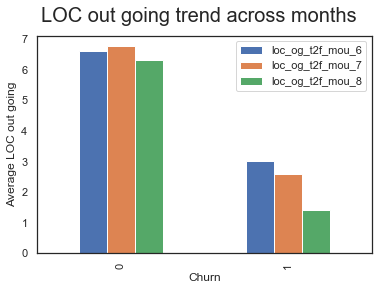

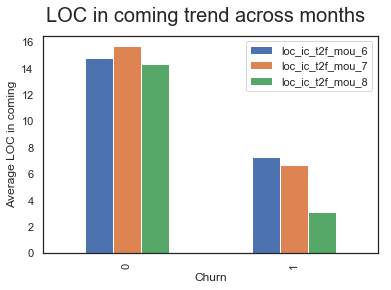

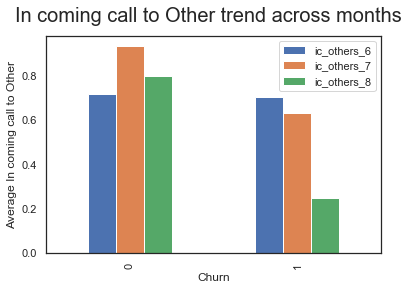

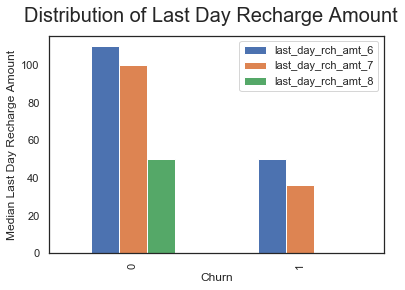

In [171]:
new_telecom_df1_temp = new_telecom_df1
new_telecom_df1_temp['churn'] = new_telecom_df1_temp['churn'].astype('object', copy = False)
df_sample = new_telecom_df1_temp.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = new_telecom_df1_temp.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = new_telecom_df1_temp.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = new_telecom_df1_temp.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()

df_sample = new_telecom_df1_temp.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()


df_sample = new_telecom_df1_temp.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

df_sample = new_telecom_df1_temp.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

df_sample = new_telecom_df1_temp.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

new_telecom_df1['churn'] = new_telecom_df1_temp['churn'].astype('object', copy = False)
df_sample = new_telecom_df1_temp.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

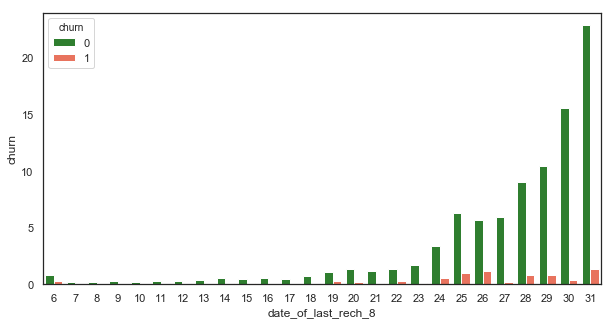

In [172]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=new_telecom_df4, palette=palette, 
            estimator=lambda x: len(x) / len(new_telecom_df4) * 100)

Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us only 3% customers as non-churn but who have actually churned

In [176]:
# Negative predictive values for each of the model 
logistic_with_pca =0.9770200148257969
logistic_with_RFE = 0.9772895947751224
random_forest_with_PCA = 0.955323469683783
random_forest_tuned = 0.9441707717569786
random_forest_all_features = 0.9441707717569786
Decision_tree_with_PCA = 0.955323469683783
Decision_tree_tuned = 0.9551693925233645

In [177]:
ls = pd.DataFrame({'model':['logistic_with_pca','logistic_with_RFE', 'random_forest_with_PCA', 'random_forest_tuned', 'random_forest_all_features', 'Decision_tree_with_PCA', 'Decision_tree_tuned'], 'negative_predictive_value':[logistic_with_pca,logistic_with_RFE, random_forest_with_PCA, random_forest_tuned, random_forest_all_features, Decision_tree_with_PCA, Decision_tree_tuned]})
ls

model  negative_predictive_value
0           logistic_with_pca                   0.977020
1           logistic_with_RFE                   0.977290
2      random_forest_with_PCA                   0.955323
3         random_forest_tuned                   0.944171
4  random_forest_all_features                   0.944171
5      Decision_tree_with_PCA                   0.955323
6         Decision_tree_tuned                   0.955169

[Text(0, 0.5, 'Negative Predictive Value'), Text(0.5, 0, 'Model')]

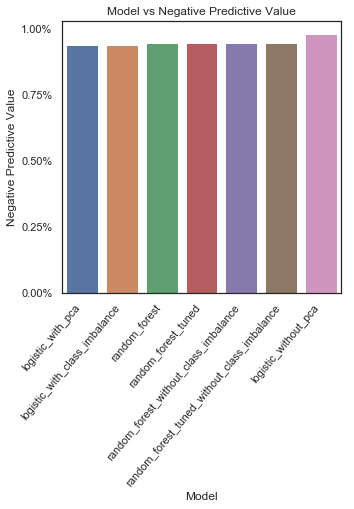

In [175]:
plt.figure(figsize = (5,5))

plt.title('Model vs Negative Predictive Value')
ax = sns.barplot(x=ls.model, y = ls.negative_predictive_value)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
sns.set_context("talk", font_scale=1.4)
ax.set(xlabel="Model", ylabel = "Negative Predictive Value") 

#### Driver Variables of Churn and Churn Analysis & Recommendation
<ul>
<li>ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.</li>
<li>date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.</li>
<li>last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.</li>
<li>roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.</li>
<li>std_ic_t2f_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.</li>
    <li>max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased</li>
    </ul>